In [2]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [3]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from nltk.tokenize import regexp_tokenize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from collections import defaultdict
import re, nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.patches as mpatches
import random
from sklearn import metrics
import re
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag, corpus
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import keras_tuner as kt
import warnings
from sklearn.metrics import precision_recall_curve
from nltk.tokenize import sent_tokenize, word_tokenize
from tensorflow.keras.models import load_model
import pickle
import os
import pickle
import numpy as np
from tensorflow.keras.models import load_model

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_p

True

In [ ]:
#UMICH SI650 - Sentiment Classification
#https://www.kaggle.com/competitions/si650winter11/data

In [6]:
! pip install -q kaggle
! mkdir ~/.kaggle

In [7]:
#Choose the kaggle.json file that you downloaded
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle competitions download -c si650winter11
! unzip si650winter11.zip -d si650winter11

  0% 0.00/506k [00:00<?, ?B/s]
100% 506k/506k [00:00<00:00, 115MB/s]
Archive:  si650winter11.zip
  inflating: si650winter11/testdata.txt  
  inflating: si650winter11/training.txt  


In [9]:
#Read test and train datasets
# header=0 -> first line contains column names
# delimiter=\t -> fields are separated by tabs
# quoting=3 -> ignore double quotes

train_data_df  = pd.read_table('si650winter11/training.txt', names=['sentiment', 'comment'], header=None, delimiter="\t", quoting=3)
test_data_df  = pd.read_table('si650winter11/testdata.txt', names=['comment'], header=None, delimiter="\t", quoting=3)

In [ ]:
test_data_df.head(5)

,comment
0,""" I don't care what anyone says, I like Hillar..."
1,have an awesome time at purdue!..
2,"Yep, I'm still in London, which is pretty awes..."
3,"Have to say, I hate Paris Hilton's behavior bu..."
4,i will love the lakers.


In [19]:
train_data_df

,sentiment,comment
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...
...,...,...
7081,0,Brokeback Mountain was boring.
7082,0,So Brokeback Mountain was really depressing.
7083,0,"As I sit here, watching the MTV Movie Awards, ..."
7084,0,Ok brokeback mountain is such a horrible movie.


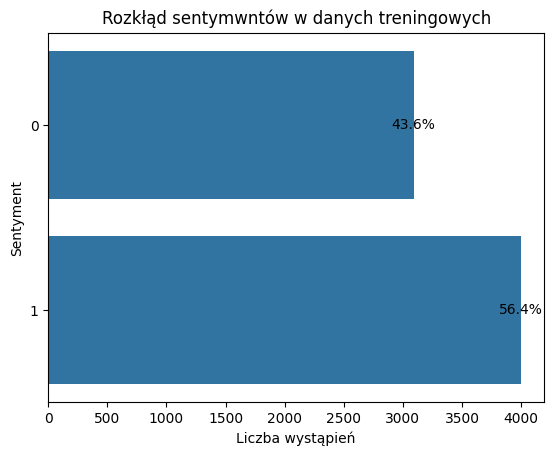

In [ ]:
ax = sns.countplot(y="sentiment", data=train_data_df)
ax.set(title="Rozkłąd sentymwntów w danych treningowych", xlabel="Liczba wystąpień", ylabel="Sentyment")
total_freq = len(train_data_df)
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total_freq:.1f}%'
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

In [ ]:
#number words per sentence
np.mean([len(s.split(" ")) for s in train_data_df.comment])

10.886819079875812

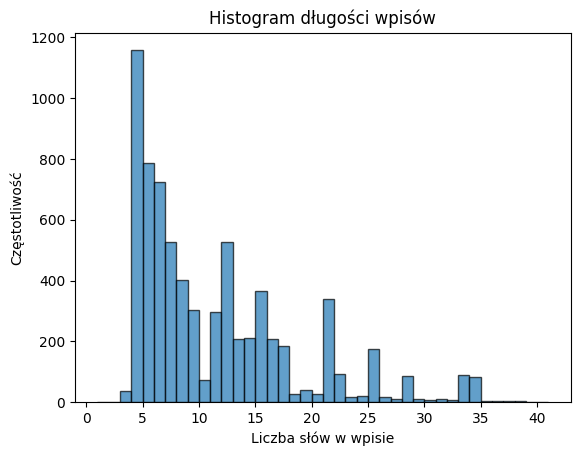

In [ ]:
#Make a frequency list of lengths of tokenized each sentences
list_freq = [len(regexp_tokenize(s, "\w+")) for s in train_data_df["comment"]]

# Plot a histogram of the line lengths
#plt.figure(figsize=(8, 6))  # Ustawienie rozmiaru figury
plt.hist(list_freq, bins=range(1, max(list_freq) + 2), edgecolor='black', alpha=0.7)
plt.title("Histogram długości wpisów")
plt.xlabel("Liczba słów w wpisie")
plt.ylabel("Częstotliwość")
plt.show()

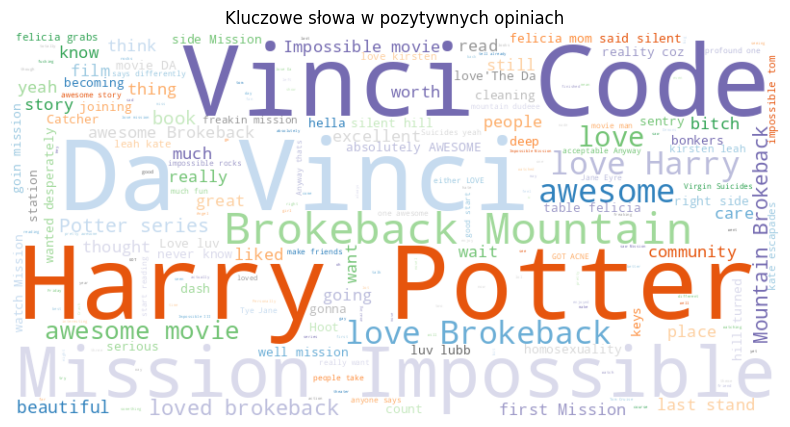

In [ ]:
positive_comments = train_data_df[train_data_df['sentiment']==1]['comment']
text = " ".join(review for review in positive_comments)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab20c').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Kluczowe słowa w pozytywnych opiniach")
plt.axis('off')
plt.show()

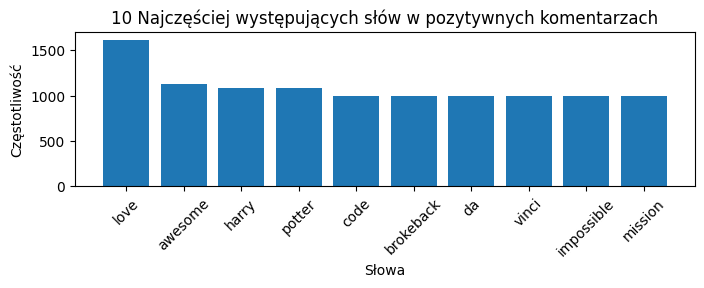

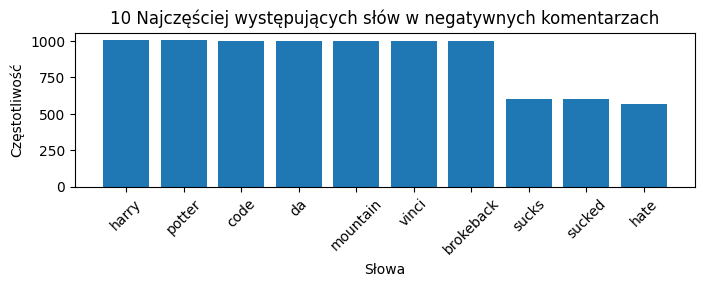

In [ ]:
vectorizer = CountVectorizer(stop_words='english')

positive_comments = train_data_df[train_data_df['sentiment'] == 1]['comment']
positive_matrix = vectorizer.fit_transform(positive_comments)
positive_freq = zip(vectorizer.get_feature_names_out(), positive_matrix.sum(axis=0).tolist()[0])
positive_freq = sorted(positive_freq, key=lambda x: -x[1])

negative_comments = train_data_df[train_data_df['sentiment'] == 0]['comment']
negative_matrix = vectorizer.fit_transform(negative_comments)
negative_freq = zip(vectorizer.get_feature_names_out(), negative_matrix.sum(axis=0).tolist()[0])
negative_freq = sorted(negative_freq, key=lambda x: -x[1])

#Create histogram for top frequent words in positive comments
labels_pos, values_pos = zip(*positive_freq[:10])
plt.figure(figsize=(8,2))
plt.bar(labels_pos, values_pos)
plt.title('10 Najczęściej występujących słów w pozytywnych komentarzach')
plt.ylabel('Częstotliwość')
plt.xlabel('Słowa')
plt.xticks(rotation=45)
plt.show()
#Create histogram for top frequent words in negative comments
labels_neg, values_neg = zip(*negative_freq[:10])
plt.figure(figsize=(8,2))
plt.bar(labels_neg, values_neg)
plt.title('10 Najczęściej występujących słów w negatywnych komentarzach')
plt.ylabel('Częstotliwość')
plt.xlabel('Słowa')
plt.xticks(rotation=45)
plt.show()

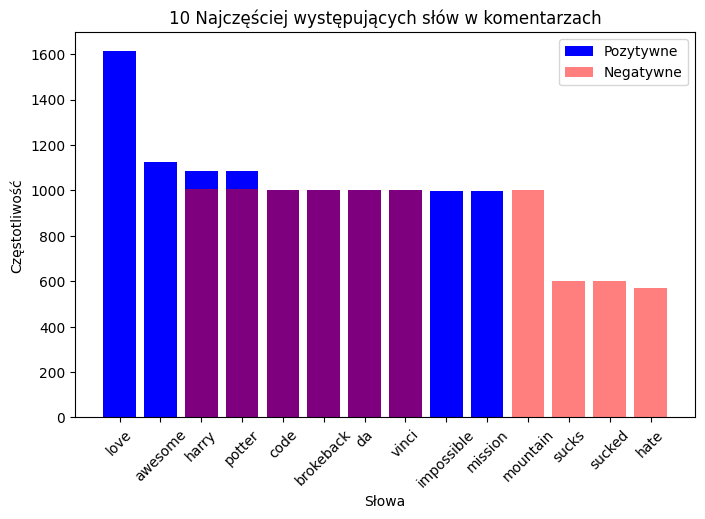

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(labels_pos, values_pos, color='blue', label='Pozytywne')
ax.bar(labels_neg, values_neg, color='red', label='Negatywne', alpha=0.5)
ax.set_title('10 Najczęściej występujących słów w komentarzach')
ax.set_ylabel('Częstotliwość')
ax.set_xlabel('Słowa')
ax.legend()
plt.xticks(rotation=45)
plt.show()

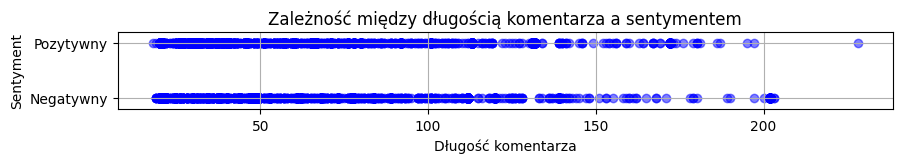

In [ ]:
plt.figure(figsize=(10, 1))
plt.scatter(train_data_df['comment'].apply(len), train_data_df['sentiment'], color='blue', alpha=0.5)  # Set transparency for better visibility when points overlap
plt.title('Zależność między długością komentarza a sentymentem')
plt.xlabel('Długość komentarza')
plt.ylabel('Sentyment')
plt.yticks([0, 1], ["Negatywny", "Pozytywny"])
plt.ylim(-0.2, 1.2)
plt.grid(True)
plt.show()

In [ ]:
#Dictionary to store sentiment lists for every word
sentiment_dict = defaultdict(list)

rows = []
for _, row in train_data_df.iterrows():
    words = row['comment'].lower().split()
    for word in words:
        sentiment_dict[word].append(row['sentiment'])

def determine_color(sentiments):
    if all(s == 1 for s in sentiments):
        return 'green'
    elif all(s == 0 for s in sentiments):
        return 'red'
    else:
        return 'orange'

color_dict = {word: determine_color(sentiments) for word, sentiments in sentiment_dict.items()}

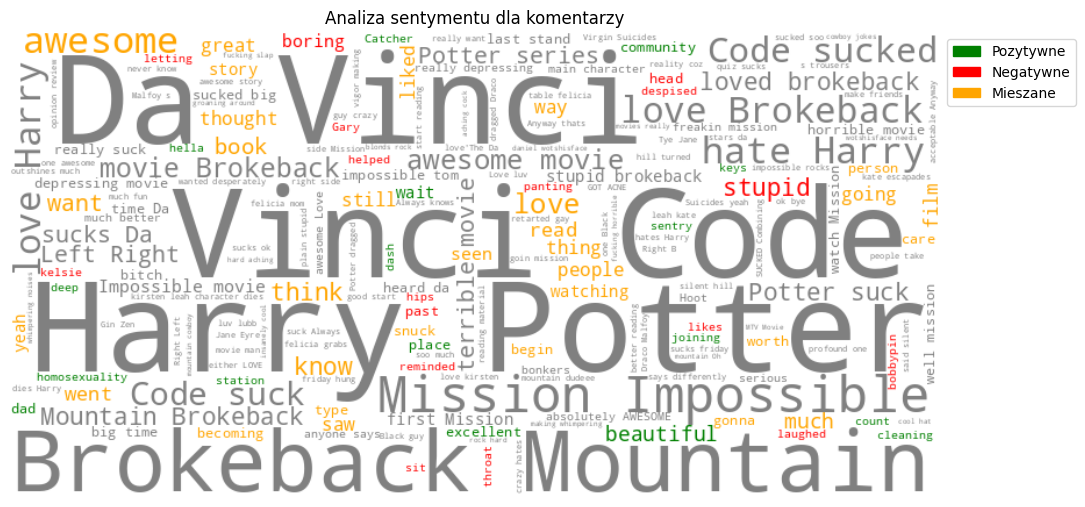

In [ ]:
#Function color_func use color dictionary
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return color_dict.get(word.lower(), 'grey')

text = ' '.join(train_data_df['comment'])

wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(text)
legend_elements = [
    mpatches.Patch(color='green', label='Pozytywne'),
    mpatches.Patch(color='red', label='Negatywne'),
    mpatches.Patch(color='orange', label='Mieszane')
]
plt.figure(figsize=(12, 7))
#plt.subplot(121)  # Użyj subplot, aby zrobić miejsce na legendę
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Analiza sentymentu dla komentarzy')
plt.axis('off')
plt.show()


In [ ]:
#Preprocessing

In [ ]:
def stem_tokens(tokens, stemmer):
  return [stemmer.stem(item) for item in tokens]

def tokenize(text):
  text = re.sub("[^a-zA-Z]", " ", text) #remove non letters
  tokens = nltk.word_tokenize(text) #tokenize
  stems = stem_tokens(tokens, PorterStemmer()) #stem
  return stems

In [ ]:
count_vect = CountVectorizer(analyzer='word', tokenizer=tokenize, lowercase=True, max_features=100, token_pattern=None)
#fits the model, model learns the vocabulary and transforms corpus data into feature vectors
comment_tf = count_vect.fit_transform(train_data_df.comment.tolist() + test_data_df.comment.tolist())
#to numpy
comment_tf_nd = comment_tf.toarray()
comment_tf_nd.shape

(40138, 100)

In [ ]:
print("Comments term frequency (CountVectorize): ")
pd.DataFrame(comment_tf_nd, columns=count_vect.get_feature_names_out()).head(5)

Comments term frequency (CountVectorize): 


,aaa,airlin,amaz,angelina,awesom,beauti,becaus,big,boston,brokeback,...,toyota,ucla,ve,vinci,wa,want,way,whi,work,world
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
tfidf_vect = TfidfVectorizer(analyzer='word', tokenizer=tokenize, lowercase=True, max_features=100, smooth_idf=False, token_pattern=None)
comment_tfidf = tfidf_vect.fit_transform(train_data_df.comment.tolist() + test_data_df.comment.tolist())
comment_tfidf_nd = comment_tfidf.toarray()
print(comment_tfidf_nd.shape)

(40138, 100)


In [ ]:
print("Comments term frequency-inverse document frequency (tf-idf):")
pd.DataFrame(comment_tfidf_nd, columns=tfidf_vect.get_feature_names_out()).head(5)

Comments term frequency-inverse document frequency (tf-idf):


,aaa,airlin,amaz,angelina,awesom,beauti,becaus,big,boston,brokeback,...,toyota,ucla,ve,vinci,wa,want,way,whi,work,world
0,0.0,0.0,0.0,0.0,0.391895,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.442319,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.384584,0.310759,0.272596,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.420995,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.420995,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.421334,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
#words in vocabulary
vocab = count_vect.get_feature_names_out()
print(vocab)

['a' 'aaa' 'about' 'an' 'and' 'angelina' 'are' 'as' 'at' 'awesom' 'be'
 'beauti' 'becaus' 'been' 'boston' 'brokeback' 'but' 'by' 'can' 'code'
 'cruis' 'da' 'even' 'for' 'francisco' 'geico' 'go' 'great' 'harri'
 'harvard' 'hate' 'have' 'he' 'hilton' 'honda' 'i' 'imposs' 'in' 'is' 'it'
 'joli' 'just' 'laker' 'like' 'london' 'love' 'm' 'macbook' 'me' 'miss'
 'mission' 'mit' 'more' 'mountain' 'movi' 'much' 'my' 'need' 'not' 'of'
 'on' 'one' 'or' 'out' 'pari' 'peopl' 'potter' 'purdu' 'realli' 's' 'san'
 'seattl' 'shanghai' 'so' 'still' 'stupid' 'suck' 't' 'than' 'that' 'the'
 'thi' 'think' 'to' 'tom' 'too' 'toyota' 'ucla' 'up' 'vinci' 'wa' 'want'
 'way' 'we' 'when' 'which' 'who' 'with' 'would' 'you']


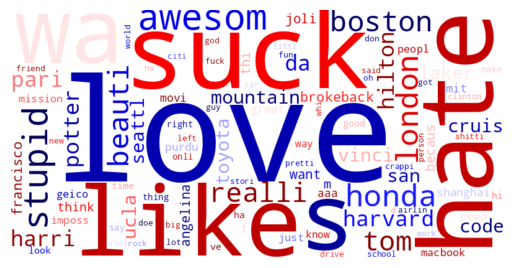

In [ ]:
sum_vocab = np.sum(comment_tf_nd, axis=0)
word_frequencies = dict(zip(vocab, sum_vocab))
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap='seismic',).generate_from_frequencies(word_frequencies)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Classification**

In [10]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
model_metrics = {}
model_metrics_temp = {}
#     }
def add_model_metrics(model_name, y_test, y_pred, y_probs, dict_name = "final"):

    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_probs)
    pr_auc = metrics.auc(recall, precision)

    if dict_name == "final":
      model_metrics[model_name] = {
        'y_pred' : y_pred,
        'y_probs' : y_probs,
        'auc': metrics.roc_auc_score(y_test, y_probs),
        'precision': metrics.precision_score(y_test, y_pred),
        'recall': metrics.recall_score(y_test, y_pred),
        'f1_score': metrics.f1_score(y_test, y_pred),
        'roc_auc': metrics.roc_auc_score(y_test, y_pred),
        'pr_auc': pr_auc,
        'log_loss': metrics.log_loss(y_test, y_probs)
      }
    if dict_name == "selection":
      model_metrics_temp[model_name] = {
          'y_pred' : y_pred,
          'y_probs' : y_probs,
          'auc': metrics.roc_auc_score(y_test, y_probs),
          'precision': metrics.precision_score(y_test, y_pred),
          'recall': metrics.recall_score(y_test, y_pred),
          'f1_score': metrics.f1_score(y_test, y_pred),
          'roc_auc': metrics.roc_auc_score(y_test, y_pred),
          'pr_auc': pr_auc,
          'log_loss': metrics.log_loss(y_test, y_probs)
          }

In [11]:
def calculate_weighted_score(metrics, weights):
    total_weight = sum(weights.values())
    aggregated_score = sum(metrics[metric] * weights[metric] for metric in metrics if metric in weights)

    if total_weight == 0:
        raise ValueError("The sum of the weights cannot be equal to zero.")

    return aggregated_score / total_weight

In [12]:
def calculate_aggregated_metric_from_dict(data, weights):

    normalized_data = {key.capitalize(): value for key, value in data.items() if key.capitalize() in weights}
    return calculate_weighted_score(normalized_data, weights)

In [13]:
def select_best_model(model_metrics_temp=model_metrics_temp, drop = True):
  best_model = None
  best_score = -float('inf')  # Initialize to negative infinity
  best_model_metrics = {}

  for model_name, model_measures in model_metrics_temp.items():
    weights = {'Precision': 0.2, 'Recall': 0.2, 'F1 Score': 0.3, 'Auc': 0.2}

    normalized_measures = {key.capitalize(): value for key, value in model_measures.items() if key.capitalize() in weights}

    # Normalize keys and calculate the score using weighted sum of the selected metrics
    score = calculate_aggregated_metric_from_dict(normalized_measures, weights)
    print("Model name: ", model_name, "-> SCORE: ", score)

    # Check if this model has a higher score
    if score > best_score:
      best_score = score
      best_model = model_name
      best_model_metrics = model_measures

  # Display the best model's metrics
  if best_model:
    print(f"Selected best model: {best_model}")
    # Save the best model metrics to a new dictionary for further usage
    model_metrics[best_model] = best_model_metrics
    #for key, value in best_model_metrics.items():
    print("Best model metrics:")
    print(*(f"{k}: {v}" for k, v in list(best_model_metrics.items())[2:]), sep="\n")
    if drop == True:
      model_metrics_temp.clear()
  else:
    print("No valid models were found.")

In [ ]:
select_best_model()

Model name:  log_sw -> SCORE:  0.5856558172549684
Model name:  log_tfidf -> SCORE:  0.66142900123064
Selected best model: log_tfidf
Best model metrics:
auc: 0.9984525275599014
precision: 0.988988988988989
recall: 0.988988988988989
f1_score: 0.988988988988989
roc_auc: 0.9873793586600832
pr_auc: 0.998991728363986
log_loss: 0.04341056431202173


In [ ]:
# find some good and bad words
df = pd.DataFrame(comment_tf_nd, columns=count_vect.get_feature_names_out())
selected_words = ['awesom', 'good', 'great', 'like', 'shitti', 'stupid', 'suck']
sum_data = dict()

for word in selected_words:
  if word in df.columns.to_list():
    sum_data[word] = df[word].sum()
  else:
    print("Word:", word, "not within the list")
print("Word frequency:", sum_data)

Word: good not within the list
Word: shitti not within the list
Word frequency: {'awesom': 3170, 'great': 1178, 'like': 4080, 'stupid': 2886, 'suck': 4614}


In [ ]:

#sum_data
df_subset = df[sum_data.keys()]
X_train, X_test, y_train, y_test  = train_test_split(df_subset[0:len(train_data_df)], train_data_df.sentiment,
                                                     train_size=0.75, random_state=1,
                                                     stratify=train_data_df.sentiment)

# **Logistic Regression**

In [21]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarnings
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
# Setup the pipeline
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

# Parameter grid for GridSearchCV
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # Values of C (inverse of regularization strength)
    'logisticregression__penalty': ['l1', 'l2'],  # Types of regularization
    'logisticregression__solver': ['liblinear', 'saga']  # Solvers that support L1 regularization
}

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',
    verbose=1
)

# Fitting grid search
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X=X_test)
y_pred_prob_sw = best_model.predict_proba(X=X_test)[:,1]
fpr_sw, tpr_sw, thresholds = metrics.roc_curve(y_test, y_pred_prob_sw)
roc_auc_sw = metrics.auc(fpr_sw, tpr_sw)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}


In [ ]:
add_model_metrics('log_sw', y_test, y_pred, y_pred_prob_sw, "selection")

In [ ]:
#tf-idf linear classifier
# train and validation set split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(comment_tfidf_nd[0:len(train_data_df)],
                                                                             train_data_df.sentiment,
                                                                             train_size=0.75,
                                                                             random_state=1,
                                                                             stratify=train_data_df.sentiment)


In [16]:
X = train_data_df['comment']
y = train_data_df['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Setup the pipeline
pipeline = make_pipeline(TfidfVectorizer(), StandardScaler(with_mean=False), LogisticRegression())

# Parameter grid for GridSearchCV
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # Values of C (inverse of regularization strength)
    'logisticregression__penalty': ['l1', 'l2'],  # Types of regularization
    'logisticregression__solver': ['liblinear', 'saga']  # Solvers that support L1 regularization
}

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',
    verbose=1
)

# Fitting grid search
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model_lr_ss_tfidf = grid_search.best_estimator_

# Predictions with the best model
y_pred_lr_ss_tfidf = best_model_lr_ss_tfidf.predict(X=X_test)
y_pred_prob_lr_ss_tfidf = best_model_lr_ss_tfidf.predict_proba(X=X_test)[:, 1]
print(metrics.classification_report(y_test, y_pred_lr_ss_tfidf))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters: {'logisticregression__C': 1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       626
           1       0.99      0.99      0.99       792

    accuracy                           0.99      1418
   macro avg       0.99      0.99      0.99      1418
weighted avg       0.99      0.99      0.99      1418



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [22]:
fpr_lr_ss_tfidf, tpr_lr_ss_tfidf, thresholds = metrics.roc_curve(y_test, y_pred_prob_lr_ss_tfidf)
roc_auc_lr_ss_tfidf = metrics.auc(fpr_lr_ss_tfidf, tpr_lr_ss_tfidf)
roc_auc_lr_ss_tfidf

0.9984408784328912

In [ ]:
add_model_metrics('logreg_standscal_tfidf', y_test, y_pred_lr_ss_tfidf, y_pred_prob_lr_ss_tfidf, "selection")

In [23]:
# Setup the pipeline
pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())

# Parameter grid for GridSearchCV
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # Values of C (inverse of regularization strength)
    'logisticregression__penalty': ['l1', 'l2'],  # Types of regularization
    'logisticregression__solver': ['liblinear', 'saga']  # Solvers that support L1 regularization
}

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',
    verbose=1
)

# Fitting grid search
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model_lr_tfidf = grid_search.best_estimator_

# Predictions with the best model
y_pred_lr_tfidf = best_model_lr_tfidf.predict(X=X_test)
y_pred_prob_lr_tfidf = best_model_lr_tfidf.predict_proba(X=X_test)[:, 1]
print(metrics.classification_report(y_test, y_pred_lr_tfidf))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'logisticregression__C': 100, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       626
           1       0.99      0.99      0.99       792

    accuracy                           0.99      1418
   macro avg       0.99      0.99      0.99      1418
weighted avg       0.99      0.99      0.99      1418



In [24]:
fpr_lr_tfidf, tpr_lr_tfidf, thresholds = metrics.roc_curve(y_test, y_pred_prob_lr_tfidf)
roc_auc_lr_tfidf = metrics.auc(fpr_lr_tfidf, tpr_lr_tfidf)

In [25]:
add_model_metrics('logreg_tfidf', y_test, y_pred_lr_tfidf, y_pred_prob_lr_tfidf, "selection")

In [34]:
# Setup the pipeline with CountVectorizer
pipeline = make_pipeline(
    CountVectorizer(),
    StandardScaler(with_mean=False),  # Necessary for handling sparse matrices
    LogisticRegression()
)

# Parameter grid for GridSearchCV
param_grid = {
    'countvectorizer__max_features': [1000, 5000, 10000],  # Optional: limit the number of features
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'saga']
}

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=1
)

# Fitting grid search
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model_lr_ss_tf = grid_search.best_estimator_

# Predictions with the best model
y_pred_lr_ss_tf = best_model_lr_ss_tf.predict(X_test)
y_pred_prob_lr_ss_tf = best_model_lr_ss_tf.predict_proba(X_test)[:, 1]
print(metrics.classification_report(y_test, y_pred_lr_ss_tf))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'countvectorizer__max_features': 5000, 'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       626
           1       0.99      0.99      0.99       792

    accuracy                           0.99      1418
   macro avg       0.99      0.99      0.99      1418
weighted avg       0.99      0.99      0.99      1418



In [35]:
fpr_lr_ss_tf, tpr_lr_ss_tf, thresholds = metrics.roc_curve(y_test, y_pred_prob_lr_ss_tf)
roc_auc_lr_ss_tf = metrics.auc(fpr_lr_ss_tf, tpr_lr_ss_tf)

In [36]:
add_model_metrics('logreg_standardscaler_tf', y_test, y_pred_lr_ss_tf, y_pred_prob_lr_ss_tf, "selection")

In [29]:
# Setup the pipeline with CountVectorizer
pipeline = make_pipeline(
    CountVectorizer(),  # Necessary for handling sparse matrices
    LogisticRegression()
)

# Parameter grid for GridSearchCV
param_grid = {
    'countvectorizer__max_features': [1000, 5000, 10000],  # Optional: limit the number of features
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'saga']
}

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=1
)

# Fitting grid search
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model_lr_tf = grid_search.best_estimator_

# Predictions with the best model
y_pred_lr_tf = best_model_lr_tf.predict(X_test)
y_pred_prob_lr_tf = best_model_lr_tf.predict_proba(X_test)[:, 1]
print(metrics.classification_report(y_test, y_pred_lr_tf))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'countvectorizer__max_features': 5000, 'logisticregression__C': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       626
           1       0.99      0.99      0.99       792

    accuracy                           0.99      1418
   macro avg       0.99      0.99      0.99      1418
weighted avg       0.99      0.99      0.99      1418



In [30]:
fpr_lr_tf, tpr_lr_tf, thresholds = metrics.roc_curve(y_test, y_pred_prob_lr_tf)
roc_auc_lr_tf = metrics.auc(fpr_lr_tf, tpr_lr_tf)

In [31]:
add_model_metrics('logreg_tf', y_test, y_pred_lr_tf, y_pred_prob_lr_tf, "selection")

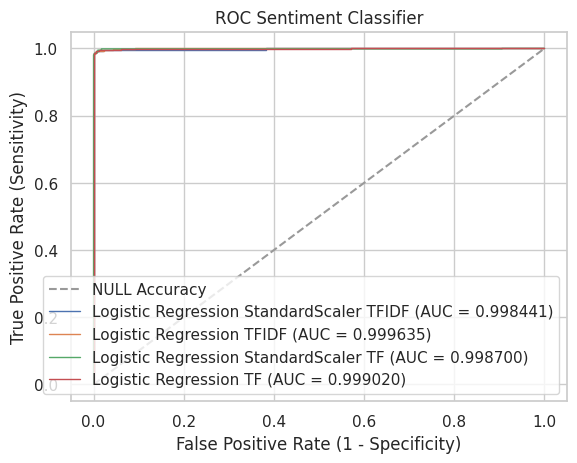

In [37]:
# ROC curves of both the Classifiers
sns.set(style='whitegrid', context='notebook')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
plt.plot(fpr_sw, tpr_sw, lw=1, label='Logistic Regression SW (AUC = %0.6f)' % roc_auc_sw)
plt.plot(fpr_lr_ss_tfidf, tpr_lr_ss_tfidf, lw=1, label='Logistic Regression StandardScaler TFIDF (AUC = %0.6f)' % roc_auc_lr_ss_tfidf)
plt.plot(fpr_lr_tfidf, tpr_lr_tfidf, lw=1, label='Logistic Regression TFIDF (AUC = %0.6f)' % roc_auc_lr_tfidf)
plt.plot(fpr_lr_ss_tf, tpr_lr_ss_tf, lw=1, label='Logistic Regression StandardScaler TF (AUC = %0.6f)' % roc_auc_lr_ss_tf)
plt.plot(fpr_lr_tf, tpr_lr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_lr_tf)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

**Select the best Logistic Regression model** </br>
**Calculate the mean of the metrics for each model and finds the model with the best (highest) score**



In [41]:
#Choose the best model
select_best_model()

Model name:  logreg_tfidf -> SCORE:  0.6634948522711374
Model name:  logreg_tf -> SCORE:  0.6630818300147374
Model name:  logreg_standardscaler_tf -> SCORE:  0.6624453584205745
Selected best model: logreg_tfidf
Best model metrics:
auc: 0.9996349275502631
precision: 0.9949302915082383
recall: 0.9911616161616161
f1_score: 0.9930423782416192
roc_auc: 0.9923859199018943
pr_auc: 0.9997214359529438
log_loss: 0.02403957308991018


# **VADER SentimentIntensityAnalyzer**

In [ ]:
# sia = SentimentIntensityAnalyzer()
# train_data_df['vader_score'] = train_data_df['comment'].apply(lambda x: sia.polarity_scores(x)['compound'])
# train_data_df['vader_pred'] = train_data_df['vader_score'].apply(lambda x: 1 if x >= 0 else 0)

# fpr_vader, tpr_vader, thresholds_vader = metrics.roc_curve(train_data_df['sentiment'], train_data_df['vader_score'])
# roc_auc_vader = metrics.auc(fpr_vader, tpr_vader)

# add_model_metrics('VADER_SentimentAnalysis', train_data_df['sentiment'], train_data_df['vader_pred'], train_data_df['vader_score'], "selection")

0.9389753610648056


In [ ]:
vader_data_df = train_data_df

sia = SentimentIntensityAnalyzer()
vader_data_df['vader_score'] = vader_data_df['comment'].apply(lambda x: sia.polarity_scores(x)['compound'])
vader_data_df['vader_pred'] = vader_data_df['vader_score'].apply(lambda x: 1 if x >= 0 else 0)

In [ ]:
fpr_vader, tpr_vader, thresholds_vader = metrics.roc_curve(train_data_df['sentiment'], train_data_df['vader_score'])
roc_auc_vader = metrics.auc(fpr_vader, tpr_vader)
roc_auc_vader

0.9389753610648056

In [ ]:
add_model_metrics('VADER', vader_data_df['sentiment'], vader_data_df['vader_pred'], vader_data_df['vader_score'], "selection")

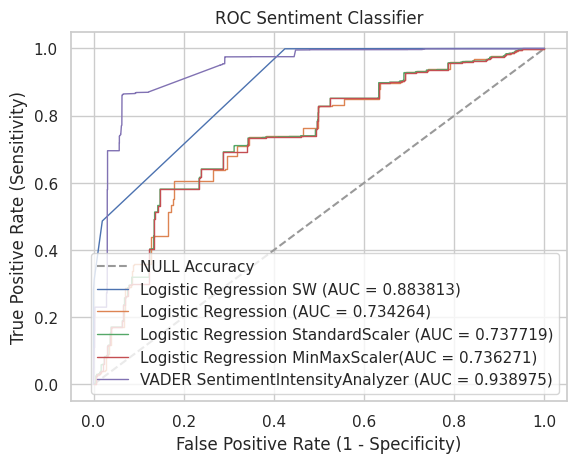

In [ ]:
sns.set(style='whitegrid', context='notebook')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
plt.plot(fpr_sw, tpr_sw, lw=1, label='Logistic Regression SW (AUC = %0.6f)' % roc_auc_sw)
plt.plot(fpr_lr_ss_tfidf, tpr_lr_ss_tfidf, lw=1, label='Logistic Regression StandardScaler TFIDF (AUC = %0.6f)' % roc_auc_lr_ss_tfidf)
plt.plot(fpr_lr_tfidf, tpr_lr_tfidf, lw=1, label='Logistic Regression TFIDF (AUC = %0.6f)' % roc_auc_lr_tfidf)
plt.plot(fpr_lr_ss_tf, tpr_lr_ss_tf, lw=1, label='Logistic Regression StandardScaler TF (AUC = %0.6f)' % roc_auc_lr_ss_tf)
plt.plot(fpr_lr_tf, tpr_lr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_lr_tf)
plt.plot(fpr_vader, tpr_vader, lw=1, label='VADER SentimentIntensityAnalyzer (AUC = %0.6f)' % roc_auc_vader)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

In [ ]:
#Lemmatization with VADER
#Lemmatize the entire text without dividing it into sentences -> This simplifies the process, but may not take into account some of the linguistic nuances that arise from sentence structure.
#Lemmatization without specifying the part of speech

def lemmatize_text(text):
  lemmatizer = WordNetLemmatizer()
  word_tokens = word_tokenize(text)
  return ' '.join([lemmatizer.lemmatize(w) for w in word_tokens])

In [ ]:
tf.get_logger().setLevel('ERROR')  # Ignore anything less severe than ERROR
vader_lemmatizer_data_df = train_data_df

sia_lemmatizer = SentimentIntensityAnalyzer()
vader_lemmatizer_data_df['lemmatized_comment'] = vader_lemmatizer_data_df['comment'].apply(lemmatize_text)
vader_lemmatizer_data_df['vader_lemma_score'] = vader_lemmatizer_data_df['lemmatized_comment'].apply(lambda x: sia_lemmatizer.polarity_scores(x)['compound'])
vader_lemmatizer_data_df['vader_lemma_pred'] = vader_lemmatizer_data_df['vader_lemma_score'].apply(lambda x: 1 if x >= 0 else 0)

In [ ]:
fpr_vader_lemmatizer, tpr_vader_lemmatizer, thresholds = metrics.roc_curve(vader_lemmatizer_data_df['sentiment'], vader_lemmatizer_data_df['vader_score'])
roc_auc_vader_lemmatizer = metrics.auc(fpr_vader_lemmatizer, tpr_vader_lemmatizer)

In [ ]:
add_model_metrics('VADER_Lemma', vader_lemmatizer_data_df['sentiment'], vader_lemmatizer_data_df['vader_lemma_pred'],
                  vader_lemmatizer_data_df['vader_lemma_score'], "selection")

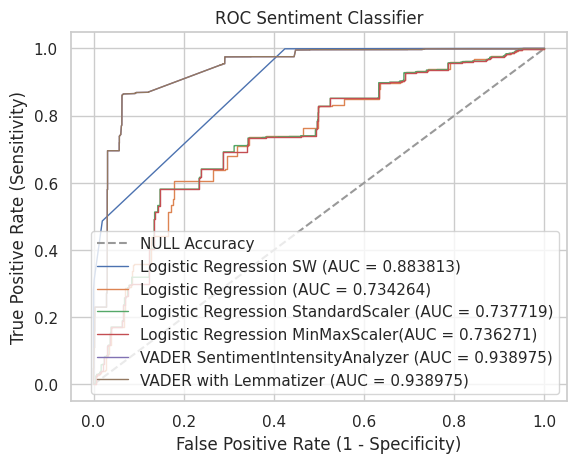

In [ ]:
sns.set(style='whitegrid', context='notebook')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
plt.plot(fpr_sw, tpr_sw, lw=1, label='Logistic Regression SW (AUC = %0.6f)' % roc_auc_sw)
plt.plot(fpr_lr_ss_tfidf, tpr_lr_ss_tfidf, lw=1, label='Logistic Regression StandardScaler TFIDF (AUC = %0.6f)' % roc_auc_lr_ss_tfidf)
plt.plot(fpr_lr_tfidf, tpr_lr_tfidf, lw=1, label='Logistic Regression TFIDF (AUC = %0.6f)' % roc_auc_lr_tfidf)
plt.plot(fpr_lr_ss_tf, tpr_lr_ss_tf, lw=1, label='Logistic Regression StandardScaler TF (AUC = %0.6f)' % roc_auc_lr_ss_tf)
plt.plot(fpr_lr_tf, tpr_lr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_lr_tf)
plt.plot(fpr_vader, tpr_vader, lw=1, label='VADER SentimentIntensityAnalyzer (AUC = %0.6f)' % roc_auc_vader)
plt.plot(fpr_vader_lemmatizer, tpr_vader_lemmatizer, lw=1, label='VADER with Lemmatizer (AUC = %0.6f)' % roc_auc_vader_lemmatizer)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

In [ ]:
def lemmatize_text(text):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    lemmatized_text = []

    # Process each sentence
    for sentence in sentences:
        words = word_tokenize(sentence)
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        lemmatized_text.append(' '.join(lemmatized_words))

    # Join the lemmatized sentences back into a single string
    return ' '.join(lemmatized_text)

In [ ]:
vader_lemma_div_data_df = train_data_df

# Sentiment analysis
sia_vader_lemma_div = SentimentIntensityAnalyzer()

vader_lemma_div_data_df['vader_lemma_div_comment'] = vader_lemma_div_data_df['comment'].apply(lemmatize_text)
vader_lemma_div_data_df['vader_lemma_div_score'] = vader_lemma_div_data_df['vader_lemma_div_comment'].apply(lambda x: sia_vader_lemma_div.polarity_scores(x)['compound'])
vader_lemma_div_data_df['vader_lemma_div_pred'] = vader_lemma_div_data_df['vader_lemma_div_score'].apply(lambda x: 1 if x >= 0 else 0)


In [ ]:
fpr_vader_lemma_div, tpr_vader_lemma_div, thresholds = metrics.roc_curve(vader_lemma_div_data_df['sentiment'], vader_lemma_div_data_df['vader_lemma_div_score'])
roc_auc_vader_lemma_div = metrics.auc(fpr_vader_lemma_div, tpr_vader_lemma_div)

In [ ]:
add_model_metrics('VADER_Lemma_Div', vader_lemma_div_data_df['sentiment'], vader_lemma_div_data_df['vader_lemma_div_pred'],
                  vader_lemma_div_data_df['vader_lemma_div_score'], "selection")

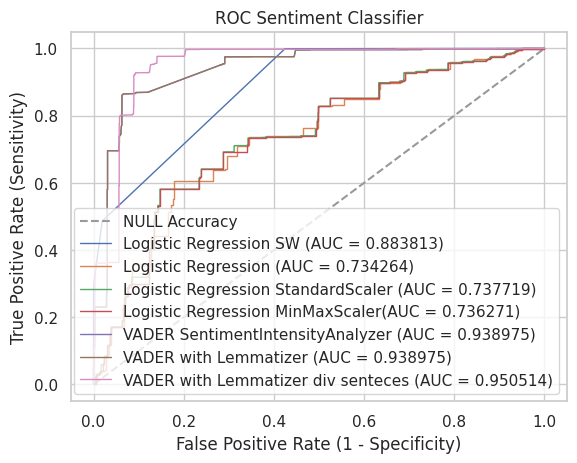

In [ ]:
sns.set(style='whitegrid', context='notebook')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
plt.plot(fpr_sw, tpr_sw, lw=1, label='Logistic Regression SW (AUC = %0.6f)' % roc_auc_sw)
plt.plot(fpr_lr_ss_tfidf, tpr_lr_ss_tfidf, lw=1, label='Logistic Regression StandardScaler TFIDF (AUC = %0.6f)' % roc_auc_lr_ss_tfidf)
plt.plot(fpr_lr_tfidf, tpr_lr_tfidf, lw=1, label='Logistic Regression TFIDF (AUC = %0.6f)' % roc_auc_lr_tfidf)
plt.plot(fpr_lr_ss_tf, tpr_lr_ss_tf, lw=1, label='Logistic Regression StandardScaler TF (AUC = %0.6f)' % roc_auc_lr_ss_tf)
plt.plot(fpr_lr_tf, tpr_lr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_lr_tf)
plt.plot(fpr_vader, tpr_vader, lw=1, label='VADER SentimentIntensityAnalyzer (AUC = %0.6f)' % roc_auc_vader)
plt.plot(fpr_vader_lemmatizer, tpr_vader_lemmatizer, lw=1, label='VADER with Lemmatizer (AUC = %0.6f)' % roc_auc_vader_lemmatizer)
plt.plot(fpr_vader_lemma_div, tpr_vader_lemma_div, lw=1, label='VADER with Lemmatizer div sentences (AUC = %0.6f)' % roc_auc_vader_lemma_div)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

In [ ]:
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to map NLTK POS tags to WordNet POS tags - Map NLTK POS tag to a format recognized by WordNetLemmatizer
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()  # Get the first character of the POS tag
    tag_dict = {
        "J": corpus.wordnet.ADJ,
        "N": corpus.wordnet.NOUN,
        "V": corpus.wordnet.VERB,
        "R": corpus.wordnet.ADV
    }
    return tag_dict.get(tag, corpus.wordnet.NOUN)  # Default to noun if no match

# Function to lemmatize text with proper POS tagging - Lemmatize text with POS tag mapping for better accuracy
def lemmatize_text(text):
    sentences = sent_tokenize(text)
    lemmatized_text = []

    for sentence in sentences:
        words = word_tokenize(sentence)
        lemmatized_sentence = ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words])
        lemmatized_text.append(lemmatized_sentence)

    return ' '.join(lemmatized_text)

In [ ]:
vader_lemma2_data_df = train_data_df

# Sentiment analysis
sia_vader_lemma2 = SentimentIntensityAnalyzer()

vader_lemma2_data_df['vader_lemma2_comment'] = vader_lemma2_data_df['comment'].apply(lemmatize_text)
vader_lemma2_data_df['vader_lemma2_score'] = vader_lemma2_data_df['vader_lemma2_comment'].apply(lambda x: sia_vader_lemma2.polarity_scores(x)['compound'])
vader_lemma2_data_df['vader_lemma2_pred'] = vader_lemma2_data_df['vader_lemma2_score'].apply(lambda x: 1 if x >= 0 else 0)


In [ ]:
fpr_vader_lemma2, tpr_vader_lemma2, thresholds = metrics.roc_curve(vader_lemma2_data_df['sentiment'], vader_lemma2_data_df['vader_lemma2_score'])
roc_auc_vader_lemma2 = metrics.auc(fpr_vader_lemma2, tpr_vader_lemma2)

In [ ]:
add_model_metrics('VADER_Lemma2', vader_lemma2_data_df['sentiment'], vader_lemma2_data_df['vader_lemma2_pred'],
                  vader_lemma2_data_df['vader_lemma2_score'], "selection")

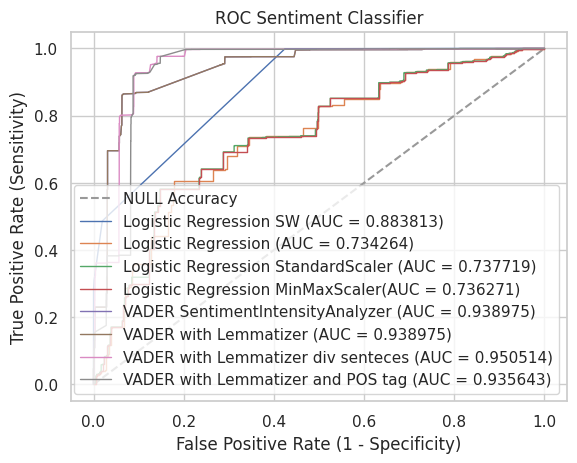

In [ ]:
sns.set(style='whitegrid', context='notebook')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
plt.plot(fpr_sw, tpr_sw, lw=1, label='Logistic Regression SW (AUC = %0.6f)' % roc_auc_sw)
plt.plot(fpr_lr_ss_tfidf, tpr_lr_ss_tfidf, lw=1, label='Logistic Regression StandardScaler TFIDF (AUC = %0.6f)' % roc_auc_lr_ss_tfidf)
plt.plot(fpr_lr_tfidf, tpr_lr_tfidf, lw=1, label='Logistic Regression TFIDF (AUC = %0.6f)' % roc_auc_lr_tfidf)
plt.plot(fpr_lr_ss_tf, tpr_lr_ss_tf, lw=1, label='Logistic Regression StandardScaler TF (AUC = %0.6f)' % roc_auc_lr_ss_tf)
plt.plot(fpr_lr_tf, tpr_lr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_lr_tf)
plt.plot(fpr_vader, tpr_vader, lw=1, label='VADER SentimentIntensityAnalyzer (AUC = %0.6f)' % roc_auc_vader)
plt.plot(fpr_vader_lemmatizer, tpr_vader_lemmatizer, lw=1, label='VADER with Lemmatizer (AUC = %0.6f)' % roc_auc_vader_lemmatizer)
plt.plot(fpr_vader_lemma_div, tpr_vader_lemma_div, lw=1, label='VADER with Lemmatizer div sentences (AUC = %0.6f)' % roc_auc_vader_lemma_div)
plt.plot(fpr_vader_lemma2, tpr_vader_lemma2, lw=1, label='VADER with Lemmatizer and POS tag (AUC = %0.6f)' % roc_auc_vader_lemma2)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

**Calculate the mean of the metrics for each model and finds the model with the best (highest) score**

In [ ]:
#Choose the best model
select_best_model()

Model name:  VADER -> SCORE:  0.6007700582032867
Model name:  VADER_Lemma -> SCORE:  0.6242117068114335
Model name:  VADER_Lemma2 -> SCORE:  0.6196786937557361
Selected best model: VADER_Lemma
Best model metrics:
auc: 0.9505137244914278
precision: 0.9067493441450036
recall: 0.9516896120150188
f1_score: 0.928676111382511
roc_auc: 0.912596666246914
pr_auc: 0.9462492044849843
log_loss: 1.7205689597714207


# **K-Neighbors Classifier**

In [ ]:
pipeline = make_pipeline(KNeighborsClassifier())

param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 10, 15],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',  # Evaluate model performance with Area Under Curve
    verbose=1  # Higher number gives more info about the process
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model_knn = grid_search.best_estimator_

# Making predictions with the best model
y_pred_knn = best_model_knn.predict(X_test)
y_pred_prob_knn = best_model_knn.predict_proba(X_test)[:,1]

fpr_knn, tpr_knn, thresholds = metrics.roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'distance'}


In [ ]:
add_model_metrics('KNN', y_test, y_pred_knn, y_pred_prob_knn, "selection")

In [ ]:
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())

param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 10, 15],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',  # Evaluate model performance with Area Under Curve
    verbose=1  # Higher number gives more info about the process
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model_knn_ss = grid_search.best_estimator_

# Making predictions with the best model
y_pred_knn_ss = best_model_knn_ss.predict(X_test)
y_pred_prob_knn_ss = best_model_knn_ss.predict_proba(X_test)[:,1]

fpr_knn_ss, tpr_knn_ss, thresholds = metrics.roc_curve(y_test, y_pred_prob_knn_ss)
roc_auc_knn_ss = metrics.auc(fpr_knn_ss, tpr_knn_ss)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'distance'}


In [ ]:
add_model_metrics('KNN_standardscaler', y_test, y_pred_knn_ss, y_pred_prob_knn_ss, "selection")

In [ ]:
# Pipeline setup with StandardScaler and PCA
pipeline = make_pipeline(StandardScaler(), PCA(), KNeighborsClassifier())

param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 10, 15],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',  # Evaluate model performance with Area Under Curve
    verbose=1  # Higher number gives more info about the process
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model_knn_ss_pca = grid_search.best_estimator_

# Making predictions with the best model
y_pred_knn_ss_pca = best_model_knn_ss_pca.predict(X_test)
y_pred_prob_knn_ss_pca = best_model_knn_ss_pca.predict_proba(X_test)[:,1]

fpr_knn_ss_pca, tpr_knn_ss_pca, thresholds = metrics.roc_curve(y_test, y_pred_prob_knn_ss_pca)
roc_auc_knn_ss_pca = metrics.auc(fpr_knn_ss_pca, tpr_knn_ss_pca)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 15, 'kneighborsclassifier__weights': 'distance'}


In [ ]:
add_model_metrics('KNN_standardscaler_pca', y_test, y_pred_knn_ss_pca, y_pred_prob_knn_ss_pca, "selection")

In [ ]:
#Choose the best KNN model
select_best_model()

Model name:  KNN -> SCORE:  0.6463989350819703
Model name:  KNN_standardscaler -> SCORE:  0.6457869508478047
Model name:  KNN_standardscaler_pca -> SCORE:  0.6387118838785601
Selected best model: KNN
Best model metrics:
auc: 0.992308667949923
precision: 0.9479472140762464
recall: 0.9685393258426966
f1_score: 0.9581326417191554
roc_auc: 0.9489110971842964
pr_auc: 0.9947960110553111
log_loss: 0.16520633279408875


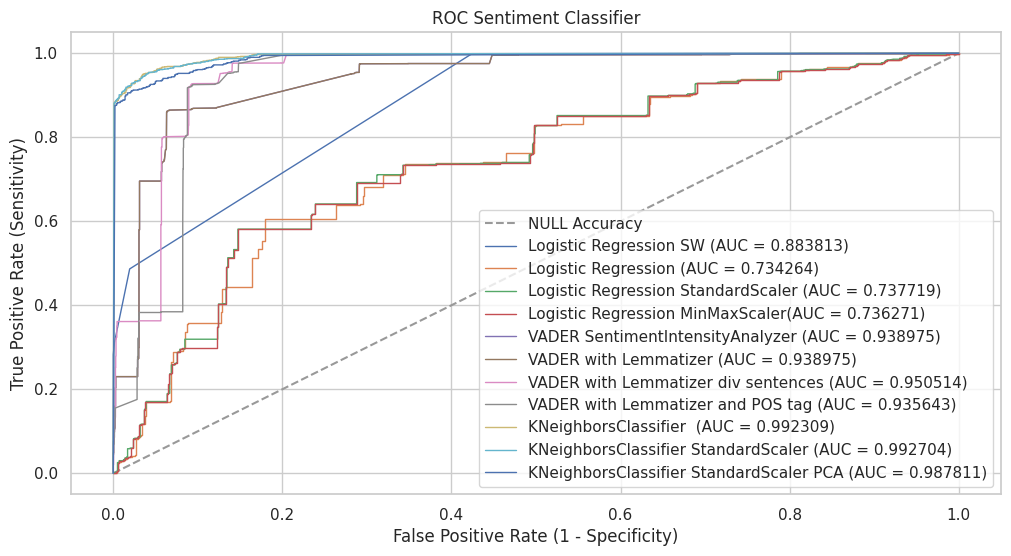

In [ ]:
sns.set(style='whitegrid', context='notebook')
plt.figure(figsize=(12, 6))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
plt.plot(fpr_sw, tpr_sw, lw=1, label='Logistic Regression SW (AUC = %0.6f)' % roc_auc_sw)
plt.plot(fpr_lr_ss_tfidf, tpr_lr_ss_tfidf, lw=1, label='Logistic Regression StandardScaler TFIDF (AUC = %0.6f)' % roc_auc_lr_ss_tfidf)
plt.plot(fpr_lr_tfidf, tpr_lr_tfidf, lw=1, label='Logistic Regression TFIDF (AUC = %0.6f)' % roc_auc_lr_tfidf)
plt.plot(fpr_lr_ss_tf, tpr_lr_ss_tf, lw=1, label='Logistic Regression StandardScaler TF (AUC = %0.6f)' % roc_auc_lr_ss_tf)
plt.plot(fpr_lr_tf, tpr_lr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_lr_tf)
plt.plot(fpr_vader, tpr_vader, lw=1, label='VADER SentimentIntensityAnalyzer (AUC = %0.6f)' % roc_auc_vader)
plt.plot(fpr_vader_lemmatizer, tpr_vader_lemmatizer, lw=1, label='VADER with Lemmatizer (AUC = %0.6f)' % roc_auc_vader_lemmatizer)
plt.plot(fpr_vader_lemma_div, tpr_vader_lemma_div, lw=1, label='VADER with Lemmatizer div sentences (AUC = %0.6f)' % roc_auc_vader_lemma_div)
plt.plot(fpr_vader_lemma2, tpr_vader_lemma2, lw=1, label='VADER with Lemmatizer and POS tag (AUC = %0.6f)' % roc_auc_vader_lemma2)
plt.plot(fpr_knn, tpr_knn, lw=1, label='KNeighborsClassifier  (AUC = %0.6f)' % roc_auc_knn)
plt.plot(fpr_knn_ss, tpr_knn_ss, lw=1, label='KNeighborsClassifier StandardScaler (AUC = %0.6f)' % roc_auc_knn_ss)
plt.plot(fpr_knn_ss_pca, tpr_knn_ss_pca, lw=1, label='KNeighborsClassifier StandardScaler PCA (AUC = %0.6f)' % roc_auc_knn_ss_pca)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

# **Decision Tree Classifier**

In [ ]:
# Setup the pipeline with a DecisionTreeClassifier
pipeline = make_pipeline(DecisionTreeClassifier(random_state=42))

param_grid = {
    'decisiontreeclassifier__max_depth': [None, 10, 20, 30, 40, 50],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
    'decisiontreeclassifier__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',  # Evaluation metric to optimize
    verbose=1  # For detailed output
)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model_decisiontree = grid_search.best_estimator_

# Make predictions using the best model
y_pred_decisiontree = best_model_decisiontree.predict(X_test)
y_pred_prob_decisiontree = best_model_decisiontree.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_decisiontree, tpr_decisiontree, thresholds = metrics.roc_curve(y_test, y_pred_prob_decisiontree)
roc_auc_decisiontree = metrics.auc(fpr_decisiontree, tpr_decisiontree)

print("ROC AUC for the best Decision Tree model:", roc_auc_decisiontree)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_samples_leaf': 4, 'decisiontreeclassifier__min_samples_split': 10}
ROC AUC for the best Decision Tree model: 0.9651174328901623


In [ ]:
add_model_metrics('DecisionTree', y_test, y_pred_decisiontree, y_pred_prob_decisiontree, "selection")

In [ ]:
pipeline = make_pipeline(RandomForestClassifier(random_state=42))

param_grid = {
    'randomforestclassifier__n_estimators': [10, 50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20, 30, 40],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',  # This can be changed to 'roc_auc' or other relevant metrics
    verbose=1  # For detailed output
)

# Assuming X_train_tf and y_train_tf are defined and prepared
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model_randomforest = grid_search.best_estimator_

# Use the best model to make predictions
y_pred_randomforest = best_model_randomforest.predict(X_test)
y_pred_prob_randomforest = best_model_randomforest.predict_proba(X_test)[:, 1]

fpr_randomforest, tpr_randomforest, thresholds = metrics.roc_curve(y_test, y_pred_prob_randomforest)
roc_auc_randomforest = metrics.auc(fpr_randomforest, tpr_randomforest)

print("ROC AUC for the best Random Forest model with TF features:", roc_auc_randomforest)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 200}
ROC AUC for the best Random Forest model with TF features: 0.9938038109733353


In [ ]:
add_model_metrics('RandomForest', y_test, y_pred_randomforest, y_pred_prob_randomforest, "selection")

In [ ]:
# Save tokenizer
with open('models/RandomForest.pkl', 'wb') as handle:
    pickle.dump(best_model_randomforest, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
#Choose the best DecisionTree model
select_best_model()

Model name:  DecisionTree -> SCORE:  0.634912114057752
Model name:  RandomForest -> SCORE:  0.6458972485745393
Selected best model: RandomForest
Best model metrics:
auc: 0.9938038109733353
precision: 0.946441672780631
recall: 0.9662921348314607
f1_score: 0.9562638991845812
roc_auc: 0.9467914857424236
pr_auc: 0.995499413182512
log_loss: 0.09713254827198674


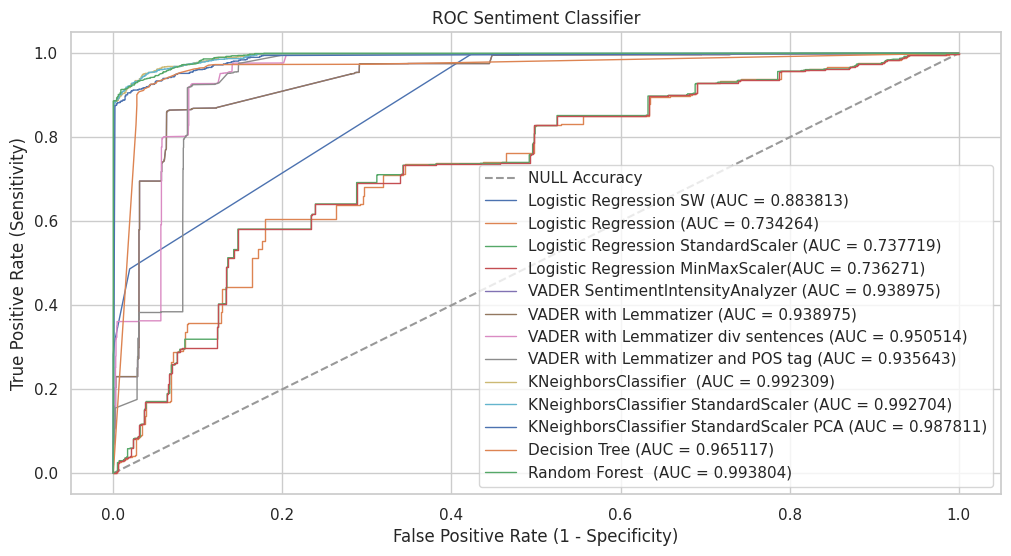

In [ ]:
sns.set(style='whitegrid', context='notebook')
plt.figure(figsize=(12, 6))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
plt.plot(fpr_sw, tpr_sw, lw=1, label='Logistic Regression SW (AUC = %0.6f)' % roc_auc_sw)
plt.plot(fpr_lr, tpr_lr, lw=1, label='Logistic Regression (AUC = %0.6f)' % roc_auc_lr)
plt.plot(fpr_lr_ss, tpr_lr_ss, lw=1, label='Logistic Regression StandardScaler (AUC = %0.6f)' % roc_auc_lr_ss)
plt.plot(fpr_lr_mm, tpr_lr_mm, lw=1, label='Logistic Regression MinMaxScaler(AUC = %0.6f)' % roc_auc_lr_mm)
plt.plot(fpr_vader, tpr_vader, lw=1, label='VADER SentimentIntensityAnalyzer (AUC = %0.6f)' % roc_auc_vader)
plt.plot(fpr_vader_lemmatizer, tpr_vader_lemmatizer, lw=1, label='VADER with Lemmatizer (AUC = %0.6f)' % roc_auc_vader_lemmatizer)
plt.plot(fpr_vader_lemma_div, tpr_vader_lemma_div, lw=1, label='VADER with Lemmatizer div sentences (AUC = %0.6f)' % roc_auc_vader_lemma_div)
plt.plot(fpr_vader_lemma2, tpr_vader_lemma2, lw=1, label='VADER with Lemmatizer and POS tag (AUC = %0.6f)' % roc_auc_vader_lemma2)
plt.plot(fpr_knn, tpr_knn, lw=1, label='KNeighborsClassifier  (AUC = %0.6f)' % roc_auc_knn)
plt.plot(fpr_knn_ss, tpr_knn_ss, lw=1, label='KNeighborsClassifier StandardScaler (AUC = %0.6f)' % roc_auc_knn_ss)
plt.plot(fpr_knn_ss_pca, tpr_knn_ss_pca, lw=1, label='KNeighborsClassifier StandardScaler PCA (AUC = %0.6f)' % roc_auc_knn_ss_pca)
plt.plot(fpr_decisiontree, tpr_decisiontree, lw=1, label='Decision Tree (AUC = %0.6f)' % roc_auc_decisiontree)
plt.plot(fpr_randomforest, tpr_randomforest, lw=1, label='Random Forest  (AUC = %0.6f)' % roc_auc_randomforest)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

# **TRAIN - VALIDATION set split**

In [ ]:
# Preprocessing parameters
vocab_size = 20000  # Max number of words in dict
max_length = 100    # Max length sequence

# Tokenizer
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_data_df.comment)

# Convert txt to sequence
X = tokenizer.texts_to_sequences(train_data_df.comment)
X = pad_sequences(X, maxlen=max_length)

y = train_data_df.sentiment.values

# Train, validation set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

CNN

In [ ]:
d

Trial 3 Complete [00h 00m 17s]
val_loss: 0.2942676842212677

Best val_loss So Far: 0.019162962213158607
Total elapsed time: 00h 01m 22s
74/74 [==============================] - 1s 10ms/step
ROC AUC Score: 0.9997672232418641


In [ ]:
add_model_metrics('CNN', y_test, y_pred_cnn, y_pred_prob_cnn, "selection")

In [ ]:
# Save the entire model as a SavedModel.
best_model_cnn.save('models/cnn')

In [ ]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
    model.add(keras.layers.Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size', values=[3, 5, 7]),
        activation='relu'))
    model.add(keras.layers.GlobalMaxPooling1D())

    # Adding L1 and L2 regularization
    l1_value = hp.Choice('l1_reg', values=[1e-2, 1e-3, 1e-4])
    l2_value = hp.Choice('l2_reg', values=[1e-2, 1e-3, 1e-4])
    model.add(keras.layers.Dense(
        units=hp.Int('units', min_value=10, max_value=100, step=10),
        activation='relu',
        kernel_regularizer=keras.regularizers.l1_l2(l1=l1_value, l2=l2_value)))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='grid_search_cnn'
)

# Make sure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]
results = best_model.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results)

y_pred_prob_cnn = best_model.predict(X_test).flatten()  # Get the probabilities
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype(int)  # Convert probabilities to binary class labels

#fpr_cnn, tpr_cnn, thresholds = metrics.roc_curve(y_test, y_pred_prob_cnn)
#roc_auc_cnn = metrics.auc(fpr_cnn, tpr_cnn)
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob_cnn)
print("ROC AUC Score:", roc_auc)


Trial 3 Complete [00h 00m 17s]
val_loss: 0.856333315372467

Best val_loss So Far: 0.03270864114165306
Total elapsed time: 00h 01m 14s
74/74 [==============================] - 1s 4ms/step - loss: 0.0327 - auc: 0.9995
Test Loss, Test AUC: [0.03270864114165306, 0.9994620680809021]
74/74 [==============================] - 0s 4ms/step
ROC AUC Score: 0.999696345703329


In [ ]:
add_model_metrics('CNN_reg', y_test, y_pred_cnn, y_pred_prob_cnn, "selection")

In [ ]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
    model.add(keras.layers.Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size', values=[3, 5, 7]),
        activation='relu'))
    model.add(keras.layers.Dropout(rate=hp.Float('dropout_conv', min_value=0.0, max_value=0.5, step=0.1)))  # Dropout po warstwie konwolucyjnej
    model.add(keras.layers.GlobalMaxPooling1D())
    model.add(keras.layers.Dense(
        units=hp.Int('units', min_value=10, max_value=100, step=10),
        activation='relu'))
    model.add(keras.layers.Dropout(rate=hp.Float('dropout_dense', min_value=0.0, max_value=0.5, step=0.1)))  # Dropout po warstwie Dense
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Przykład użycia tylko Dropout w tunerze
tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='grid_search_cnn'
)

# Upewnij się, że X_train, y_train, X_test, y_test są poprawnie zdefiniowane i przetworzone
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]
results = best_model.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results)

y_pred_prob_cnn = best_model.predict(X_test).flatten()  # Pobierz prawdopodobieństwa
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype(int)  # Konwertuj prawdopodobieństwa na etykiety klas binarnych

roc_auc = metrics.roc_auc_score(y_test, y_pred_prob_cnn)
print("ROC AUC Score:", roc_auc)


Trial 3 Complete [00h 00m 24s]
val_loss: 0.17413437366485596

Best val_loss So Far: 0.01869051903486252
Total elapsed time: 00h 01m 09s
74/74 [==============================] - 1s 4ms/step - loss: 0.0187 - auc: 0.9995
Test Loss, Test AUC: [0.01869051903486252, 0.9994665384292603]
74/74 [==============================] - 0s 3ms/step
ROC AUC Score: 0.9997015682588


In [ ]:
add_model_metrics('CNN_dropout', y_test, y_pred_cnn, y_pred_prob_cnn, "selection")

In [ ]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
    model.add(keras.layers.Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size', values=[3, 5, 7]),
        activation='relu'))
    model.add(keras.layers.Dropout(rate=hp.Float('dropout_conv', min_value=0.0, max_value=0.5, step=0.1)))  # Dropout after convolution
    model.add(keras.layers.GlobalMaxPooling1D())
    model.add(keras.layers.Dense(
        units=hp.Int('units', min_value=10, max_value=100, step=10),
        activation='relu',
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Choice('l1_reg', values=[1e-2, 1e-3, 1e-4]),
            l2=hp.Choice('l2_reg', values=[1e-2, 1e-3, 1e-4]))))
    model.add(keras.layers.Dropout(rate=hp.Float('dropout_dense', min_value=0.0, max_value=0.5, step=0.1)))  # Dropout after dense layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Przykład użycia regularyzacji i Dropout w tunerze
tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='grid_search_cnn'
)

# Upewnij się, że X_train, y_train, X_test, y_test są poprawnie zdefiniowane i przetworzone
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]
results = best_model.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results)

y_pred_prob_cnn = best_model.predict(X_test).flatten()  # Pobierz prawdopodobieństwa
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype(int)  # Konwertuj prawdopodobieństwa na etykiety klas binarnych

roc_auc = metrics.roc_auc_score(y_test, y_pred_prob_cnn)
print("ROC AUC Score:", roc_auc)

Trial 3 Complete [00h 00m 43s]
val_loss: 0.8290933966636658

Best val_loss So Far: 0.029557591304183006
Total elapsed time: 00h 01m 16s
74/74 [==============================] - 1s 3ms/step - loss: 0.0296 - auc: 0.9995
Test Loss, Test AUC: [0.029557591304183006, 0.9994904398918152]
74/74 [==============================] - 0s 3ms/step
ROC AUC Score: 0.999332258979065


In [ ]:
add_model_metrics('CNN_reg_dropout', y_test, y_pred_cnn, y_pred_prob_cnn, "selection")

In [ ]:
#Choose the best CNN model
select_best_model()

Model name:  CNN -> SCORE:  0.6642830196882774
Model name:  CNN_reg -> SCORE:  0.663288580220976
Model name:  CNN_dropout -> SCORE:  0.664268429692041
Model name:  CNN_reg_dropout -> SCORE:  0.6640223976297969
Selected best model: CNN
Best model metrics:
auc: 0.9997672232418641
precision: 0.9954988747186797
recall: 0.9940074906367041
f1_score: 0.994752623688156
roc_auc: 0.9940156975095871
pr_auc: 0.9998320396909206
log_loss: 0.01916295680345368


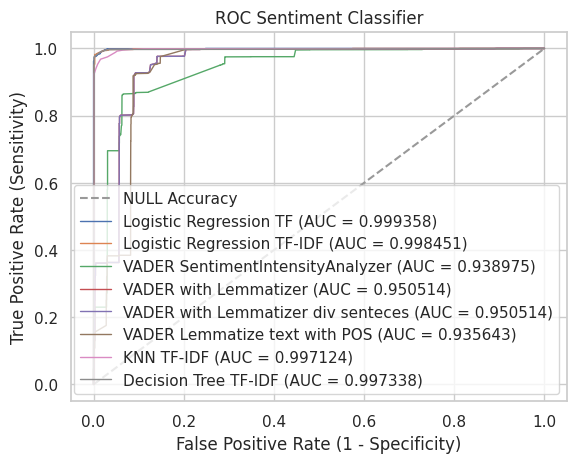

In [ ]:
sns.set(style='whitegrid', context='notebook')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
plt.plot(fpr_tf, tpr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_tf)
plt.plot(fpr_tfidf, tpr_tfidf, lw=1, label='Logistic Regression TF-IDF (AUC = %0.6f)' % roc_auc_tfidf)
plt.plot(fpr_vader, tpr_vader, lw=1, label='VADER SentimentIntensityAnalyzer (AUC = %0.6f)' % roc_auc_vader)
plt.plot(fpr_lemmatizer, tpr_lemmatizer, lw=1, label='VADER with Lemmatizer (AUC = %0.6f)' % roc_auc_lemmatizer)
plt.plot(fpr_lem_div, tpr_lem_div, lw=1, label='VADER with Lemmatizer div senteces (AUC = %0.6f)' % roc_auc_lem_div)
plt.plot(fpr_lem2, tpr_lem2, lw=1, label='VADER Lemmatize text with POS (AUC = %0.6f)' % roc_auc_lem2)
plt.plot(fpr_tfidf_knn, tpr_tfidf_knn, lw=1, label='KNN TF-IDF (AUC = %0.6f)' % roc_auc_tfidf_knn)
plt.plot(fpr_tfidf_dt, tpr_tfidf_dt, lw=1, label='Decision Tree TF-IDF (AUC = %0.6f)' % roc_auc_tfidf_dt)
#plt.plot(fpr_cnn, tpr_cnn, lw=1, label='Convolutional Neural Network (AUC = %0.6f)' % roc_auc_cnn)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

In [ ]:
#Recurrent Neural Network (RNN)

model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
model_rnn.add(SimpleRNN(units=50))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
model_rnn.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

y_pred_prob_rnn = model_rnn.predict(X_test).flatten()
y_pred_rnn = (y_pred_prob_rnn > 0.5).astype(int)
fpr_rnn, tpr_rnn, thresholds = metrics.roc_curve(y_test, y_pred_prob_rnn)
roc_auc_rnn = metrics.auc(fpr_rnn, tpr_rnn)

print(f"ROC AUC: {roc_auc_rnn}")


Epoch 1/5
149/149 [==============================] - 9s 53ms/step - loss: 0.2594 - auc: 0.9681 - val_loss: 0.1134 - val_auc: 0.9957
Epoch 2/5
149/149 [==============================] - 6s 39ms/step - loss: 0.0428 - auc: 0.9994 - val_loss: 0.0582 - val_auc: 0.9982
Epoch 3/5
149/149 [==============================] - 7s 50ms/step - loss: 0.0090 - auc: 1.0000 - val_loss: 0.0634 - val_auc: 0.9977
Epoch 4/5
149/149 [==============================] - 6s 39ms/step - loss: 0.0067 - auc: 1.0000 - val_loss: 0.0483 - val_auc: 0.9983
Epoch 5/5
74/74 [==============================] - 1s 8ms/step
ROC AUC: 0.998674963069072


In [ ]:
add_model_metrics('RNN', y_test, y_pred_rnn, y_pred_prob_rnn, "selection")

In [ ]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a LSTM layer
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
        return_sequences=False,  # set to True if stacking LSTM layers, else False
        dropout=hp.Float('lstm_dropout', min_value=0.0, max_value=0.5, step=0.1),  # dropout for input
        recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.5, step=0.1)  # dropout for recurrent state
    ))

    model.add(keras.layers.Dense(
        units=hp.Int('dense_units', min_value=10, max_value=100, step=10),
        activation='relu'))
    model.add(keras.layers.Dropout(rate=hp.Float('dense_dropout', min_value=0.0, max_value=0.5, step=0.1)))  # Dropout after dense layer

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]
results = best_model.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results)

y_pred_prob_rnn = best_model.predict(X_test).flatten()  # Get the probabilities
y_pred_rnn = (y_pred_prob_rnn > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc = metrics.roc_auc_score(y_test, y_pred_prob_rnn)
print("ROC AUC Score:", roc_auc)


Trial 3 Complete [00h 01m 32s]
val_loss: 0.14426130056381226

Best val_loss So Far: 0.03776315227150917
Total elapsed time: 00h 04m 23s
74/74 [==============================] - 6s 27ms/step - loss: 0.0378 - auc: 0.9985
Test Loss, Test AUC: [0.03776315227150917, 0.998530924320221]
74/74 [==============================] - 3s 24ms/step
ROC AUC Score: 0.9992889863765909


In [ ]:
add_model_metrics('RNN_dropout', y_test, y_pred_cnn, y_pred_prob_cnn, "selection")

In [ ]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a LSTM layer with dropout
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
        return_sequences=False,  # set to True if stacking LSTM layers, else False
        dropout=hp.Float('lstm_dropout', min_value=0.0, max_value=0.5, step=0.1),  # dropout for input
        recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.5, step=0.1)  # dropout for recurrent state
    ))

    # Adding a Dense layer with L1 and L2 regularization
    model.add(keras.layers.Dense(
        units=hp.Int('dense_units', min_value=10, max_value=100, step=10),
        activation='relu',
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Float('l1_reg', min_value=1e-5, max_value=1e-2, sampling='log'),
            l2=hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='log')
        )))

    model.add(keras.layers.Dropout(rate=hp.Float('dense_dropout', min_value=0.0, max_value=0.5, step=0.1)))  # Dropout after dense layer

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]
results = best_model.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results)

y_pred_prob_rnn = best_model.predict(X_test).flatten()  # Get the probabilities
y_pred_rnn = (y_pred_prob_rnn > 0.5).astype(int)  # Convert probabilities to binary class labels

from sklearn import metrics
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob_rnn)
print("ROC AUC Score:", roc_auc)


Trial 3 Complete [00h 01m 00s]
val_loss: 0.13761448860168457

Best val_loss So Far: 0.044195085763931274
Total elapsed time: 00h 03m 29s
74/74 [==============================] - 3s 17ms/step - loss: 0.0442 - auc: 0.9991
Test Loss, Test AUC: [0.044195085763931274, 0.9990924000740051]
74/74 [==============================] - 1s 13ms/step
ROC AUC Score: 0.999079338078398


In [ ]:
add_model_metrics('RNN_reg_dropout', y_test, y_pred_cnn, y_pred_prob_cnn, "selection")

In [ ]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a LSTM layer
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
        return_sequences=False  # set to True if stacking LSTM layers, else False
    ))

    # Adding a Dense layer with L1 and L2 regularization
    model.add(keras.layers.Dense(
        units=hp.Int('dense_units', min_value=10, max_value=100, step=10),
        activation='relu',
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Float('l1_reg', min_value=1e-5, max_value=1e-2, sampling='log'),
            l2=hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='log')
        )))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]
results = best_model.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results)

y_pred_prob_rnn = best_model.predict(X_test).flatten()  # Get the probabilities
y_pred_rnn = (y_pred_prob_rnn > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc = metrics.roc_auc_score(y_test, y_pred_prob_rnn)
print("ROC AUC Score:", roc_auc)


Trial 3 Complete [00h 01m 26s]
val_loss: 0.21195894479751587

Best val_loss So Far: 0.047311827540397644
Total elapsed time: 00h 03m 48s
74/74 [==============================] - 2s 15ms/step - loss: 0.0473 - auc: 0.9981
Test Loss, Test AUC: [0.047311827540397644, 0.9981109499931335]
74/74 [==============================] - 2s 14ms/step
ROC AUC Score: 0.9988308936538491


In [ ]:
add_model_metrics('RNN_reg', y_test, y_pred_cnn, y_pred_prob_cnn, "selection")

In [ ]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a simple LSTM layer
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
        return_sequences=False  # Set to True if stacking LSTM layers, else False
    ))

    # Adding a Dense layer
    model.add(keras.layers.Dense(
        units=hp.Int('dense_units', min_value=10, max_value=100, step=10),
        activation='relu'
    ))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]
results = best_model.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results)

y_pred_prob_rnn = best_model.predict(X_test).flatten()  # Get the probabilities
y_pred_rnn = (y_pred_prob_rnn > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc = metrics.roc_auc_score(y_test, y_pred_prob_rnn)
print("ROC AUC Score:", roc_auc)


Trial 3 Complete [00h 01m 26s]
val_loss: 0.14439016580581665

Best val_loss So Far: 0.048507727682590485
Total elapsed time: 00h 03m 20s
74/74 [==============================] - 4s 31ms/step - loss: 0.0485 - auc: 0.9964
Test Loss, Test AUC: [0.048507727682590485, 0.9964471459388733]
74/74 [==============================] - 3s 26ms/step
ROC AUC Score: 0.99885103779638


In [ ]:
add_model_metrics('RNN_gs', y_test, y_pred_cnn, y_pred_prob_cnn, "selection")

In [ ]:
#Choose the best RNN model
select_best_model()

Model name:  RNN -> SCORE:  0.6588737042696486
Model name:  RNN_dropout -> SCORE:  0.6640223976297969
Model name:  RNN_reg_dropout -> SCORE:  0.6640223976297969
Model name:  RNN_reg -> SCORE:  0.6640223976297969
Model name:  RNN_gs -> SCORE:  0.6640223976297969
Selected best model: RNN_dropout
Best model metrics:
auc: 0.999332258979065
precision: 0.9940119760479041
recall: 0.9947565543071161
f1_score: 0.9943841257955821
roc_auc: 0.9933942134085381
pr_auc: 0.9996477337605904
log_loss: 0.01897309251899185


# **LSTM**

In [ ]:
#LSTM

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
model_lstm.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
149/149 [==============================] - 17s 90ms/step - loss: 0.3435 - auc: 0.9495 - val_loss: 0.1037 - val_auc: 0.9925
Epoch 2/5
149/149 [==============================] - 12s 83ms/step - loss: 0.0474 - auc: 0.9986 - val_loss: 0.0550 - val_auc: 0.9967
Epoch 3/5
149/149 [==============================] - 12s 80ms/step - loss: 0.0113 - auc: 1.0000 - val_loss: 0.0526 - val_auc: 0.9964
Epoch 4/5
149/149 [==============================] - 11s 72ms/step - loss: 0.0064 - auc: 1.0000 - val_loss: 0.0599 - val_auc: 0.9952
Epoch 5/5
149/149 [==============================] - 11s 74ms/step - loss: 0.0046 - auc: 1.0000 - val_loss: 0.0474 - val_auc: 0.9976


In [ ]:
y_pred_prob_lstm = model_lstm.predict(X_test).flatten()
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int)
fpr_lstm, tpr_lstm, thresholds = metrics.roc_curve(y_test, y_pred_prob_lstm)
roc_auc_lstm = metrics.auc(fpr_lstm, tpr_lstm)

add_model_metrics('LSTM', y_test, y_pred_lstm, y_pred_prob_lstm, "selection")
print(f"ROC AUC: {roc_auc_lstm}")

74/74 [==============================] - 2s 24ms/step
ROC AUC: 0.9988092573526121


In [ ]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a simple LSTM layer
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
        return_sequences=False  # Set to True if stacking LSTM layers, else False
    ))

    # Adding a Dense layer for output
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]
results = best_model.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results)

y_pred_prob_lstm = best_model.predict(X_test).flatten()  # Get the probabilities
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc = metrics.roc_auc_score(y_test, y_pred_prob_lstm)
print("ROC AUC Score:", roc_auc)

Trial 3 Complete [00h 01m 26s]
val_loss: 0.2537553310394287

Best val_loss So Far: 0.03380525857210159
Total elapsed time: 00h 04m 18s
74/74 [==============================] - 2s 14ms/step - loss: 0.0338 - auc: 0.9989
Test Loss, Test AUC: [0.03380525857210159, 0.9988827109336853]
74/74 [==============================] - 2s 20ms/step
ROC AUC Score: 0.9993419580106541


In [ ]:
add_model_metrics('LSTM_gs', y_test, y_pred_lstm, y_pred_prob_lstm, "selection")

In [ ]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a simple LSTM layer
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
        return_sequences=False  # Set to True if stacking LSTM layers, else False
    ))

    # Adding a Dense layer for output with L1 and L2 regularization
    model.add(keras.layers.Dense(
        units=1,
        activation='sigmoid',
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Float('l1_reg', min_value=1e-5, max_value=1e-2, sampling='log'),
            l2=hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='log')
        )))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]
results = best_model.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results)

y_pred_prob_lstm = best_model.predict(X_test). flatten()  # Get the probabilities
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc = metrics.roc_auc_score(y_test, y_pred_prob_lstm)
print("ROC AUC Score:", roc_auc)

Trial 3 Complete [00h 00m 58s]
val_loss: 0.23634323477745056

Best val_loss So Far: 0.04285849630832672
Total elapsed time: 00h 03m 22s
74/74 [==============================] - 2s 16ms/step - loss: 0.0429 - auc: 0.9973
Test Loss, Test AUC: [0.04285849630832672, 0.9972618818283081]
74/74 [==============================] - 2s 21ms/step
ROC AUC Score: 0.999219600996762


In [ ]:
add_model_metrics('LSTM_reg', y_test, y_pred_lstm, y_pred_prob_lstm, "selection")

In [ ]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a LSTM layer with dropout and recurrent dropout
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
        return_sequences=False,  # Set to True if stacking LSTM layers, else False
        dropout=hp.Float('dropout_rate', min_value=0, max_value=0.5, step=0.1),
        recurrent_dropout=hp.Float('recurrent_dropout_rate', min_value=0, max_value=0.5, step=0.1)
    ))

    # Adding a Dense layer with L1 and L2 regularization
    model.add(keras.layers.Dense(
        units=1,
        activation='sigmoid',
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Float('l1_reg', min_value=1e-5, max_value=1e-2, sampling='log'),
            l2=hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='log')
        )))

    # Adding dropout after the Dense layer
    model.add(keras.layers.Dropout(hp.Float('dense_dropout_rate', min_value=0, max_value=0.5, step=0.1)))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]
results = best_model.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results)

y_pred_prob_lstm = best_model.predict(X_test).flatten()  # Get the probabilities
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc = metrics.roc_auc_score(y_test, y_pred_prob_lstm)
print("ROC AUC Score:", roc_auc)

Trial 3 Complete [00h 00m 58s]
val_loss: 0.21852229535579681

Best val_loss So Far: 0.04736919328570366
Total elapsed time: 00h 03m 50s
74/74 [==============================] - 2s 14ms/step - loss: 0.0474 - auc: 0.9960
Test Loss, Test AUC: [0.04736919328570366, 0.9960417747497559]
74/74 [==============================] - 1s 13ms/step
ROC AUC Score: 0.997471537072683


In [ ]:
add_model_metrics('LSTM_reg_dropout', y_test, y_pred_lstm, y_pred_prob_lstm, "selection")

In [ ]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a LSTM layer with dropout and recurrent dropout
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
        return_sequences=False,  # Set to True if stacking LSTM layers, else False
        dropout=hp.Float('dropout_rate', min_value=0, max_value=0.5, step=0.1),
        recurrent_dropout=hp.Float('recurrent_dropout_rate', min_value=0, max_value=0.5, step=0.1)
    ))

    # Adding a Dense layer for output
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Optional: Adding dropout after the Dense layer
    model.add(keras.layers.Dropout(hp.Float('dense_dropout_rate', min_value=0, max_value=0.5, step=0.1)))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]
results = best_model.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results)

y_pred_prob_lstm = best_model.predict(X_test).flatten()  # Get the probabilities
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc = metrics.roc_auc_score(y_test, y_pred_prob_lstm)
print("ROC AUC Score:", roc_auc)

Trial 3 Complete [00h 00m 56s]
val_loss: 0.20935292541980743

Best val_loss So Far: 0.04224560409784317
Total elapsed time: 00h 03m 49s
74/74 [==============================] - 2s 16ms/step - loss: 0.0422 - auc: 0.9955
Test Loss, Test AUC: [0.04224560409784317, 0.9955131411552429]
74/74 [==============================] - 2s 21ms/step
ROC AUC Score: 0.9984101048987569


In [ ]:
add_model_metrics('LSTM_dropout', y_test, y_pred_lstm, y_pred_prob_lstm, "selection")

In [ ]:
#Choose the best LSTM model
select_best_model()

Model name:  LSTM -> SCORE:  0.6612771576758792
Model name:  LSTM_gs -> SCORE:  0.6608702909229178
Model name:  LSTM_reg -> SCORE:  0.6620044610266622
Model name:  LSTM_reg_dropout -> SCORE:  0.6616251644799822
Model name:  LSTM_dropout -> SCORE:  0.6624863041324627
Selected best model: LSTM_dropout
Best model metrics:
auc: 0.9984101048987569
precision: 0.9910179640718563
recall: 0.9917602996254682
f1_score: 0.9913889928865592
roc_auc: 0.9899040541952042
pr_auc: 0.9985393488345282
log_loss: 0.04224632981980771


# **GRU**

In [ ]:
#GRU
model_gru = Sequential()
model_gru.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
model_gru.add(GRU(units=50))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
model_gru.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
149/149 [==============================] - 16s 87ms/step - loss: 0.2663 - auc: 0.9716 - val_loss: 0.0804 - val_auc: 0.9972
Epoch 2/5
149/149 [==============================] - 12s 80ms/step - loss: 0.0290 - auc: 0.9993 - val_loss: 0.0474 - val_auc: 0.9966
Epoch 3/5
149/149 [==============================] - 13s 89ms/step - loss: 0.0072 - auc: 1.0000 - val_loss: 0.0379 - val_auc: 0.9990
Epoch 4/5
149/149 [==============================] - 12s 81ms/step - loss: 0.0053 - auc: 1.0000 - val_loss: 0.0442 - val_auc: 0.9988
Epoch 5/5
149/149 [==============================] - 14s 95ms/step - loss: 0.0033 - auc: 0.9998 - val_loss: 0.0467 - val_auc: 0.9959


In [ ]:
y_pred_prob_gru = model_gru.predict(X_test).flatten()
y_pred_gru = (y_pred_prob_gru > 0.5).astype(int)
fpr_gru, tpr_gru, thresholds = metrics.roc_curve(y_test, y_pred_prob_gru)
roc_auc_gru = metrics.auc(fpr_gru, tpr_gru)
add_model_metrics('GRU', y_test, y_pred_gru, y_pred_prob_gru, "selection")

print(f"ROC AUC: {roc_auc_gru}")

74/74 [==============================] - 2s 15ms/step
ROC AUC: 0.998503364817882


In [ ]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a GRU layer
    model.add(keras.layers.GRU(
        units=hp.Int('gru_units', min_value=32, max_value=256, step=32),
        return_sequences=False  # Set to True if stacking GRU layers, else False
    ))

    # Adding a Dense layer for output
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='gru_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]
results = best_model.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results)

y_pred_prob_gru = best_model.predict(X_test).flatten()  # Get the probabilities
y_pred_gru = (y_pred_prob_gru > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc = metrics.roc_auc_score(y_test, y_pred_prob_gru)
print("ROC AUC Score:", roc_auc)

Trial 3 Complete [00h 01m 26s]
val_loss: 0.12818394601345062

Best val_loss So Far: 0.03082791157066822
Total elapsed time: 00h 03m 26s
74/74 [==============================] - 2s 13ms/step - loss: 0.0308 - auc: 0.9983
Test Loss, Test AUC: [0.03082791157066822, 0.998288094997406]
74/74 [==============================] - 2s 15ms/step
ROC AUC Score: 0.999456854231016


In [ ]:
add_model_metrics('GRU_gs', y_test, y_pred_gru, y_pred_prob_gru, "selection")

In [ ]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a GRU layer with L1 and L2 regularization
    model.add(keras.layers.GRU(
        units=hp.Int('gru_units', min_value=32, max_value=256, step=32),
        return_sequences=False,  # Set to True if stacking GRU layers, else False
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Float('l1_reg_gru', min_value=1e-5, max_value=1e-2, sampling='log'),
            l2=hp.Float('l2_reg_gru', min_value=1e-5, max_value=1e-2, sampling='log')
        )
    ))

    # Adding a Dense layer for output with L1 and L2 regularization
    model.add(keras.layers.Dense(
        units=1,
        activation='sigmoid',
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Float('l1_reg_dense', min_value=1e-5, max_value=1e-2, sampling='log'),
            l2=hp.Float('l2_reg_dense', min_value=1e-5, max_value=1e-2, sampling='log')
        )))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='gru_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]
results = best_model.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results)

y_pred_prob_gru = best_model.predict(X_test).flatten()  # Get the probabilities
y_pred_gru = (y_pred_prob_gru > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc = metrics.roc_auc_score(y_test, y_pred_prob_gru)
print("ROC AUC Score:", roc_auc)

Trial 3 Complete [00h 01m 26s]
val_loss: 0.13227353990077972

Best val_loss So Far: 0.0374404676258564
Total elapsed time: 00h 03m 54s
74/74 [==============================] - 2s 15ms/step - loss: 0.0374 - auc: 0.9977
Test Loss, Test AUC: [0.0374404676258564, 0.997663676738739]
74/74 [==============================] - 1s 13ms/step
ROC AUC Score: 0.999157676410463


In [ ]:
add_model_metrics('GRU_reg', y_test, y_pred_gru, y_pred_prob_gru, "selection")

In [ ]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a GRU layer with dropout and recurrent dropout
    model.add(keras.layers.GRU(
        units=hp.Int('gru_units', min_value=32, max_value=256, step=32),
        return_sequences=False,  # Set to True if stacking GRU layers, else False
        dropout=hp.Float('dropout_rate', min_value=0, max_value=0.5, step=0.1),
        recurrent_dropout=hp.Float('recurrent_dropout_rate', min_value=0, max_value=0.5, step=0.1)
    ))

    # Adding a Dense layer for output
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Optional: Adding dropout after the Dense layer
    model.add(keras.layers.Dropout(hp.Float('dense_dropout_rate', min_value=0, max_value=0.5, step=0.1)))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='gru_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]
results = best_model.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results)

y_pred_prob_gru = best_model.predict(X_test).flatten()  # Get the probabilities
y_pred_gru = (y_pred_prob_gru > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc = metrics.roc_auc_score(y_test, y_pred_prob_gru)
print("ROC AUC Score:", roc_auc)

Trial 3 Complete [00h 01m 26s]
val_loss: 0.1284855455160141

Best val_loss So Far: 0.03908867761492729
Total elapsed time: 00h 03m 50s
74/74 [==============================] - 2s 14ms/step - loss: 0.0391 - auc: 0.9989
Test Loss, Test AUC: [0.03908867761492729, 0.9989312291145325]
74/74 [==============================] - 2s 14ms/step
ROC AUC Score: 0.999219600996762


In [ ]:
add_model_metrics('GRU_dropout', y_test, y_pred_gru, y_pred_prob_gru, "selection")

In [ ]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a GRU layer with dropout, recurrent dropout and L1, L2 regularization
    model.add(keras.layers.GRU(
        units=hp.Int('gru_units', min_value=32, max_value=256, step=32),
        return_sequences=False,  # Set to True if stacking GRU layers, else False
        dropout=hp.Float('dropout_rate', min_value=0, max_value=0.5, step=0.1),
        recurrent_dropout=hp.Float('recurrent_dropout_rate', min_value=0, max_value=0.5, step=0.1),
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Float('l1_reg', min_value=1e-5, max_value=1e-2, sampling='log'),
            l2=hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='log')
        )
    ))

    # Adding a Dense layer for output with L1 and L2 regularization
    model.add(keras.layers.Dense(
        units=1,
        activation='sigmoid',
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Float('l1_reg', min_value=1e-5, max_value=1e-2, sampling='log'),
            l2=hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='log')
        )))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='gru_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]
results = best_model.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results)

y_pred_prob_gru = best_model.predict(X_test).flatten()  # Get the probabilities
y_pred_gru = (y_pred_prob_gru > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc = metrics.roc_auc_score(y_test, y_pred_prob_gru)
print("ROC AUC Score:", roc_auc)

Trial 3 Complete [00h 01m 26s]
val_loss: 0.1457720249891281

Best val_loss So Far: 0.04709465801715851
Total elapsed time: 00h 03m 50s
74/74 [==============================] - 2s 15ms/step - loss: 0.0471 - auc: 0.9984
Test Loss, Test AUC: [0.04709465801715851, 0.9983940720558167]
74/74 [==============================] - 1s 13ms/step
ROC AUC Score: 0.999020397809511


In [ ]:
add_model_metrics('GRU_reg_dropout', y_test, y_pred_gru, y_pred_prob_gru, "selection")

In [ ]:
#Choose the best GRU model
select_best_model()

Model name:  GRU -> SCORE:  0.6621865084574206
Model name:  GRU_gs -> SCORE:  0.6625421673257974
Model name:  GRU_reg -> SCORE:  0.661983479464092
Model name:  GRU_dropout -> SCORE:  0.6602390697646477
Model name:  GRU_reg_dropout -> SCORE:  0.6601150464701184
Selected best model: GRU_gs
Best model metrics:
auc: 0.999456854231016
precision: 0.9947169811320755
recall: 0.9872659176029962
f1_score: 0.9909774436090226
roc_auc: 0.9901469030246056
pr_auc: 0.9995874951795173
log_loss: 0.030827917079509916


In [ ]:
# Obliczanie wartości dla krzywej PR
precision, recall, thresholds = metrics.precision_recall_curve(y_pred_gru, y_pred_prob_gru)

# Rysowanie krzywej PR
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

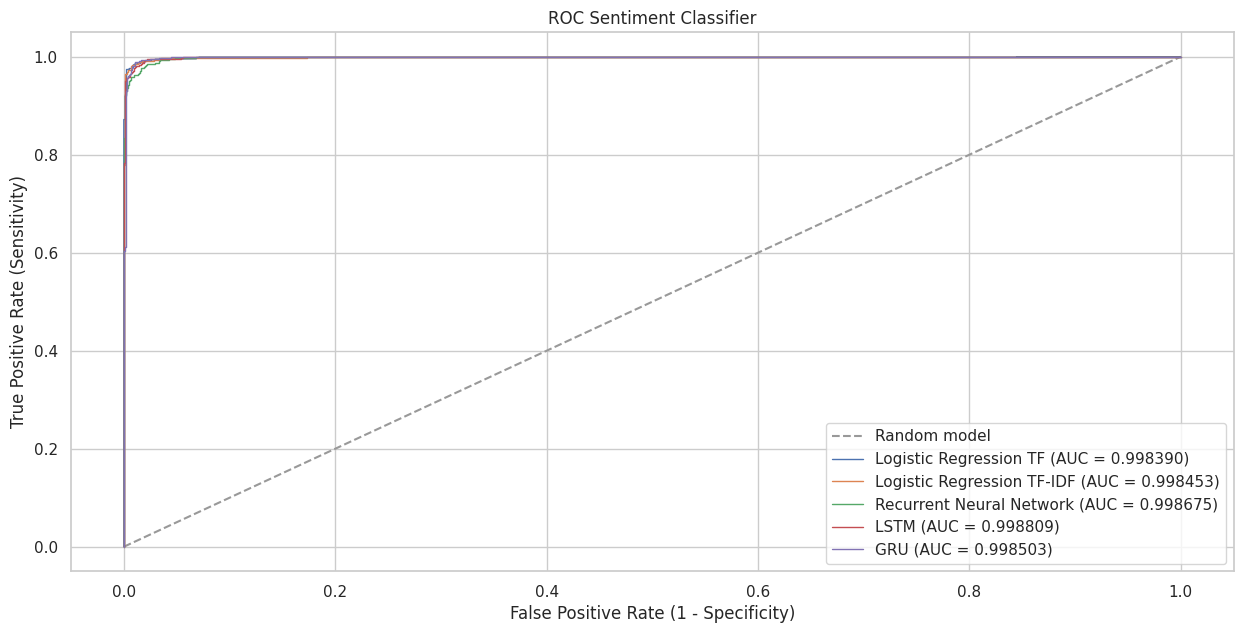

In [ ]:
sns.set(style='whitegrid', context='notebook')
plt.figure(figsize=(15, 7))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random model')
plt.plot(fpr_tf, tpr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_tf)
plt.plot(fpr_tfidf, tpr_tfidf, lw=1, label='Logistic Regression TF-IDF (AUC = %0.6f)' % roc_auc_tfidf)
# plt.plot(fpr_vader, tpr_vader, lw=1, label='VADER SentimentIntensityAnalyzer (AUC = %0.6f)' % roc_auc_vader)
# plt.plot(fpr_lemmatizer, tpr_lemmatizer, lw=1, label='VADER with Lemmatizer (AUC = %0.6f)' % roc_auc_lemmatizer)
# plt.plot(fpr_lem_div, tpr_lem_div, lw=1, label='VADER with Lemmatizer div senteces (AUC = %0.6f)' % roc_auc_lem_div)
# plt.plot(fpr_lem2, tpr_lem2, lw=1, label='VADER Lemmatize text with POS (AUC = %0.6f)' % roc_auc_lem2)
# plt.plot(fpr_tfidf_knn, tpr_tfidf_knn, lw=1, label='KNN TF-IDF (AUC = %0.6f)' % roc_auc_tfidf_knn)
# plt.plot(fpr_tfidf_dt, tpr_tfidf_dt, lw=1, label='Decision Tree TF-IDF (AUC = %0.6f)' % roc_auc_tfidf_dt)
# #plt.plot(fpr_cnn, tpr_cnn, lw=1, label='Convolutional Neural Network (AUC = %0.6f)' % roc_auc_cnn)
plt.plot(fpr_rnn, tpr_rnn, lw=1, label='Recurrent Neural Network (AUC = %0.6f)' % roc_auc_rnn)
plt.plot(fpr_lstm, tpr_lstm, lw=1, label='LSTM (AUC = %0.6f)' % roc_auc_lstm)
plt.plot(fpr_gru, tpr_gru, lw=1, label='GRU (AUC = %0.6f)' % roc_auc_gru)

plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

In [ ]:
# def get_palette(metric_values, base_color="blue"):
#     # Normalize the metric values to range between 0 and 1
#     normalized = (metric_values - metric_values.min()) / (metric_values.max() - metric_values.min())
#     # Create a palette that darkens with higher values
#     palette = sns.dark_palette(base_color, n_colors=len(metric_values))
#     # Sort the palette by metric values, reversed for darker colors at higher values
#     return [palette[i] for i in normalized.argsort()[::-1]]


In [ ]:
df_model_metrics = pd.DataFrame(model_metrics).T
df_model_metrics

,auc,precision,recall,f1_score,roc_auc,pr_auc,Score,y_pred,y_probs,log_loss
model_log_tfidf,0.998,0.992,0.985,0.988,0.987,0.999,0.661111,NaN,NaN,NaN
log_tfidf,0.998453,0.988989,0.988989,0.988989,0.987379,0.998992,0.661429,"[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, ...","[0.0012654871960613282, 0.9847231037350953, 0....",0.043411
CNN,0.999767,0.995499,0.994007,0.994753,0.994016,0.999832,0.664283,"[1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...","[0.9998153, 5.0483184e-05, 0.99965847, 3.85542...",0.019163
RNN_dropout,0.999332,0.994012,0.994757,0.994384,0.993394,0.999648,0.664022,"[1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...","[0.99983454, 2.1386233e-05, 0.99996805, 0.0001...",0.018973
LSTM_dropout,0.99841,0.991018,0.99176,0.991389,0.989904,0.998539,0.662486,"[1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...","[0.9998065, 3.4869583e-05, 0.9978819, 8.995358...",0.042246
GRU_gs,0.999457,0.994717,0.987266,0.990977,0.990147,0.999587,0.662542,"[1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...","[0.9997517, 0.00018080005, 0.99985826, 0.00035...",0.030828
logreg,0.734264,0.640827,0.928839,0.75841,0.618304,0.751853,NaN,"[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, ...","[0.5898659972593248, 0.5679769358312474, 0.562...",0.721823
VADER_Lemma,0.950514,0.906749,0.95169,0.928676,0.912597,0.946249,NaN,0 1 1 1 2 1 3 1 4 ...,0 0.6249 1 0.5023 2 0.4215 3...,1.720569
KNN,0.992309,0.947947,0.968539,0.958133,0.948911,0.994796,NaN,"[1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...","[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, ...",0.165206
RandomForest,0.993804,0.946442,0.966292,0.956264,0.946791,0.995499,NaN,"[1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...","[0.9974895658193285, 0.00028337813620071687, 1...",0.097133


In [ ]:
#model_metrics

Error: Missing 'y_probs' or 'y_pred' for model_log_tfidf


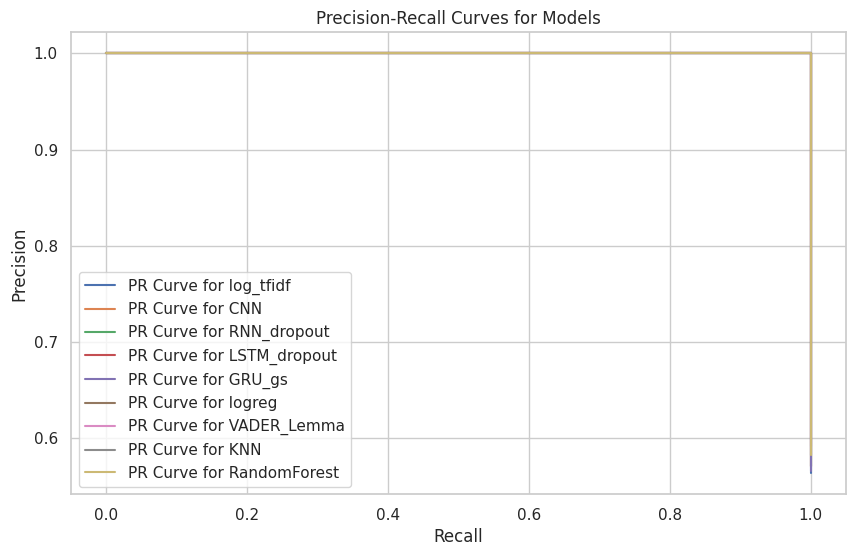

In [ ]:

# Assuming 'y_true' contains the actual labels corresponding to the predictions and probabilities
# y_true = np.array([...])  # You need to provide this

# Accessing model probabilities and plotting PR curves
fig, ax = plt.subplots(figsize=(10, 6))

for model_name, model_data in model_metrics.items():
  if 'y_probs' in model_data and 'y_pred' in model_data:
    # Extract probabilities and true labels
    y_scores = np.array(model_data['y_probs'])
    y_true = np.array(model_data['y_pred'])  # Only if y_pred corresponds to true labels

    # Compute precision-recall values
    precision, recall, _ = metrics.precision_recall_curve(y_true, y_scores)

    # Plot the precision-recall curve for the model
    ax.plot(recall, precision, label=f'PR Curve for {model_name}')
  else:
    print(f"Error: Missing 'y_probs' or 'y_pred' for {model_name}")

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curves for Models')
ax.legend(loc="best")
plt.show()


In [ ]:
# Transpose the DataFrame for easier plotting
#df_model_metrics = df_model_metrics.T

In [ ]:
# def plot_performance_metrics(df_model_metrics):
#     # Suppress future warnings locally
#     with warnings.catch_warnings():
#         warnings.simplefilter("ignore", category=FutureWarning)

#         # Set the aesthetic style of the plots
#         sns.set(style="whitegrid")

#         # Define the layout of the subplots
#         # Assuming the first two keys are not metrics
#         num_metrics = len(df_model_metrics) - 3
#         num_columns = 3
#         num_rows = (num_metrics + num_columns - 1) // num_columns  # Round up the division

#         # Create a figure with subplots
#         fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, num_rows * 5), sharey='row')
#         fig.suptitle('Performance Metrics Comparison Across Models', fontsize=16)

#         # Flatten axes array and hide unused axes
#         axes = axes.flatten()
#         for ax in axes[num_metrics:]:
#             ax.set_visible(False)

#         # Loop through each metric starting from the third one and create a bar plot
#         for ax, (metric, values) in zip(axes, df_model_metrics.iloc[2:].iterrows()):

#             # Calculate mean for each model's predictions
#             means = [np.mean(pred) if isinstance(pred, np.ndarray) or isinstance(pred, pd.Series) else pred for pred in values]

#             sns.barplot(ax=ax, x=values.index.tolist(), y=means, palette='light:b', width=0.8)
#             ax.set_title(metric)
#             ax.set_ylabel('Value')
#             ax.set_xlabel('Model')
#             ax.tick_params(axis='x', rotation=90)

#             # Adjusting the annotation placement
#             for p in ax.patches:
#                 value = p.get_height()
#                 x = p.get_x() + p.get_width() / 2
#                 # Adjusting y to ensure the annotation always fits within the plot area
#                 if value >= ax.get_ylim()[1] * 0.9:  # If value is within the top 5% of the y-axis
#                     y = ax.get_ylim()[1] * 0.85  # Lower the annotation to 95% of the y-axis height
#                 else:
#                     y = value + 0.01 * ax.get_ylim()[1]  # Else, slightly above the bar
#                 ax.annotate(f"{value:.2f}", (x, y), ha='center', va='bottom', fontsize=10, color='#06172a', xytext=(0, 3), textcoords='offset points')

#         plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#         plt.show()


In [ ]:
# def plot_performance_metrics(df_model_metrics):
#     # Suppress future warnings locally
#     with warnings.catch_warnings():
#         warnings.simplefilter("ignore", category=FutureWarning)

#         # Set the aesthetic style of the plots
#         sns.set(style="whitegrid")

#         # Define the layout of the subplots
#         # Assume there's only one model if the DataFrame has fewer than 3 columns
#         if df_model_metrics.shape[1] <= 3:
#             # Single plot for one model with multiple metrics
#             fig, ax = plt.subplots(figsize=(8, 6))
#             metrics = df_model_metrics.iloc[2:].index
#             means = [np.mean(df_model_metrics.loc[metric]) for metric in metrics]

#             sns.barplot(ax=ax, x=metrics, y=means, palette='viridis')
#             ax.set_title('Performance Metrics for the Model')
#             ax.set_ylabel('Value')
#             ax.set_xlabel('Metric')
#             ax.tick_params(axis='x', rotation=45)

#             # Annotate the bars
#             # for p in ax.patches:
#             #     ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), textcoords='offset points')
#             for p in ax.patches:
#                 value = p.get_height()
#                 x = p.get_x() + p.get_width() / 2
#                 # Adjusting y to ensure the annotation always fits within the plot area
#                 if value >= ax.get_ylim()[1] * 0.9:  # If value is within the top 5% of the y-axis
#                     y = ax.get_ylim()[1] * 0.85  # Lower the annotation to 95% of the y-axis height
#                 else:
#                     y = value + 0.01 * ax.get_ylim()[1]  # Else, slightly above the bar
#                 ax.annotate(f"{value:.2f}", (x, y), ha='center', va='bottom', fontsize=10, color='#06172a', xytext=(0, 3), textcoords='offset points')
#         else:
#             # Multiple models with potentially multiple metrics
#             num_metrics = len(df_model_metrics) - 2
#             num_columns = 3
#             num_rows = max(1, (num_metrics + num_columns - 1) // num_columns)  # Round up the division

#             fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, num_rows * 5), sharey='row')
#             fig.suptitle('Performance Metrics Comparison Across Models', fontsize=16)

#             axes = axes.flatten()
#             for ax in axes[num_metrics:]:
#                 ax.set_visible(False)

#             for ax, (metric, values) in zip(axes, df_model_metrics.iloc[2:].iterrows()):
#                 means = [np.mean(pred) if isinstance(pred, np.ndarray) or isinstance(pred, pd.Series) else pred for pred in values]
#                 sns.barplot(ax=ax, x=values.index.tolist(), y=means, palette='viridis', width=0.8)
#                 ax.set_title(metric)
#                 ax.set_ylabel('Value')
#                 ax.set_xlabel('Model')
#                 ax.tick_params(axis='x', rotation=90)

#         plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#         plt.show()



In [ ]:
def plot_performance_metrics(df_model_metrics):
    # Suppress future warnings locally
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)

        # Set the aesthetic style of the plots
        sns.set(style="whitegrid")

        # Define a list of metrics to be plotted
        metrics_to_plot = ['auc', 'precision', 'recall', 'f1_score', 'roc_auc', 'pr_auc']

        # Filter the DataFrame to include only the specified metrics
        filtered_metrics = df_model_metrics[metrics_to_plot]

        # Check the number of models (columns) after filtering
        num_models = len(df_model_metrics)

        # Single plot for one model with multiple metrics or multiple plots if multiple models
        if num_models == 1:
          # Single model case
          fig, ax = plt.subplots(figsize=(8, 4))
          sns.barplot(data=filtered_metrics, ax=ax, palette='viridis')
          ax.set_title('Performance Metrics for the Model')
          ax.set_ylabel('Value')
          ax.set_xlabel('Metric')
          ax.tick_params(axis='x', rotation=45)
          # Annotate the bars
          # for p in ax.patches:
          #   ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), textcoords='offset points')
          for p in ax.patches:
                value = p.get_height()
                x = p.get_x() + p.get_width() / 2
                # Adjusting y to ensure the annotation always fits within the plot area
                if value >= ax.get_ylim()[1] * 0.9:  # If value is within the top 5% of the y-axis
                    y = ax.get_ylim()[1] * 0.85  # Lower the annotation to 95% of the y-axis height
                else:
                    y = value + 0.01 * ax.get_ylim()[1]  # Else, slightly above the bar
                ax.annotate(f"{value:.2f}", (x, y), ha='center', va='bottom', fontsize=10, color='#06172a', xytext=(0, 3), textcoords='offset points')
        else:
          # Multiple models case
          fig, axes = plt.subplots(figsize=(20, 6))
          melted_df = filtered_metrics.reset_index().melt(id_vars='index')
          sns.barplot(x='variable', y='value', hue='index', data=melted_df, ax=axes, palette='viridis')
          axes.set_title('Performance Metrics Comparison Across Models')
          axes.set_ylabel('Value')
          axes.set_xlabel('Metric')
          axes.tick_params(axis='x', rotation=45)
          axes.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

          for p in axes.patches:
                value = p.get_height()
                x = p.get_x() + p.get_width() / 2
                # Adjusting y to ensure the annotation always fits within the plot area
                if value >= axes.get_ylim()[1] * 0.9:  # If value is within the top 5% of the y-axis
                    y = axes.get_ylim()[1] * 0.85  # Lower the annotation to 95% of the y-axis height
                else:
                    y = value + 0.01 * axes.get_ylim()[1]  # Else, slightly above the bar
                axes.annotate(f"{value:.2f}", (x, y), ha='center', va='bottom', fontsize=10, color='#06172a', xytext=(0, 3), textcoords='offset points')



        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


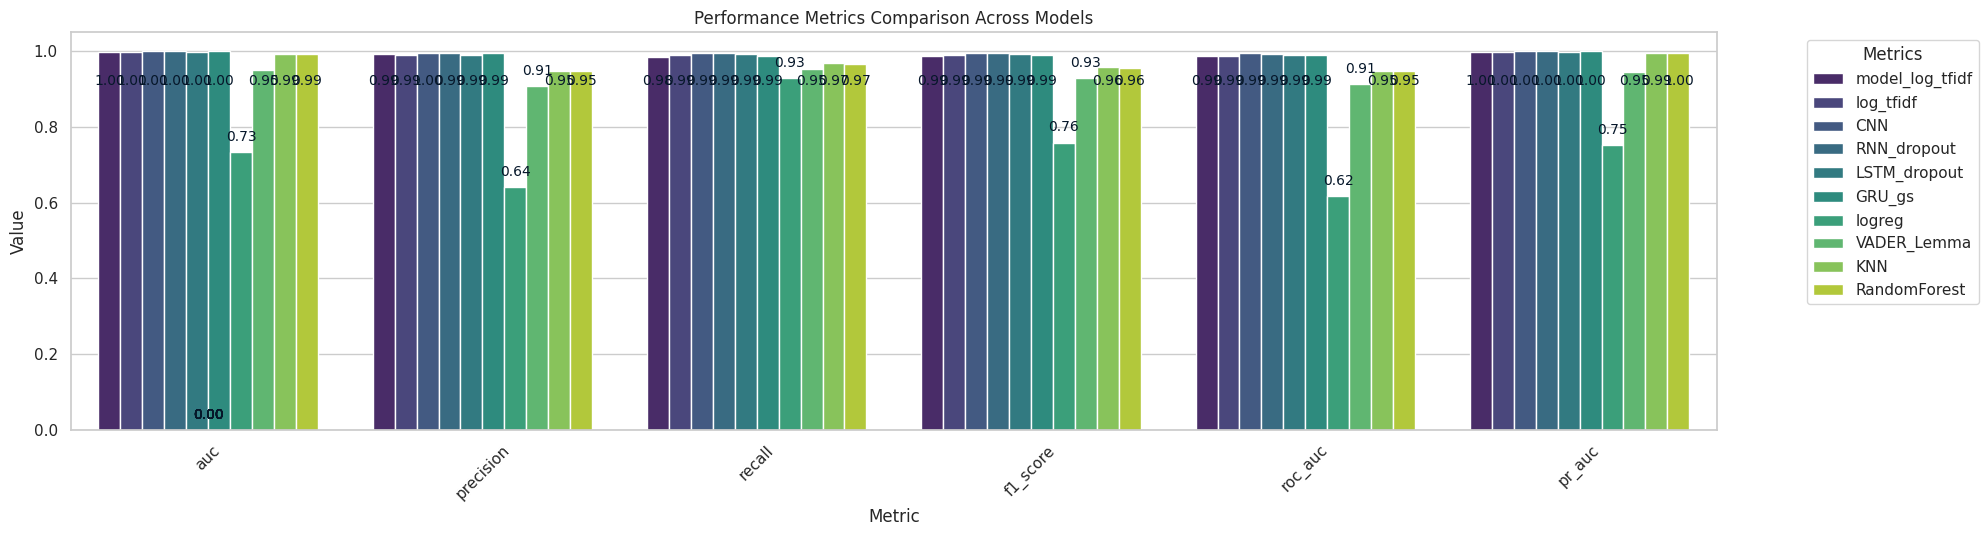

In [ ]:
#df_model_metrics = df_model_metrics.T
plot_performance_metrics(df_model_metrics)

In [ ]:
def select_top_best_models(metrics_dict=None, drop=True, top_n=3):
    # Use a global dictionary if none is provided
    if metrics_dict is None:
        global model_metrics_temp
        metrics_dict = model_metrics_temp

    # Add calculated scores to each model's metrics
    for model_name, model_measures in metrics_dict.items():
        weights = {'Precision': 0.2, 'Recall': 0.2, 'F1 Score': 0.3, 'Auc': 0.2}
        normalized_measures = {key.capitalize(): value for key, value in model_measures.items() if key.capitalize() in weights}
        model_measures['Score'] = calculate_aggregated_metric_from_dict(normalized_measures, weights)

    # Sort and select the top models based on the newly added 'Score'
    best_models = sorted(metrics_dict.items(), key=lambda x: x[1]['Score'], reverse=True)[:top_n]
    top_models_dict = {model_name: measures for model_name, measures in best_models}

    # Display metrics for the top models
    if top_models_dict:
        for model_name, measures in top_models_dict.items():
            print(f"Selected top model: {model_name}")
            print("Model metrics:")
            print(*(f"{k}: {v}" for k, v in measures.items() if k != 'Score'), sep="\n")
            print("Score:", measures['Score'])
    else:
        print("No valid models were found.")

    # Optionally clear the original metrics dictionary
    if drop:
        metrics_dict.clear()

    # Return the dictionary containing only the best models
    return top_models_dict

def calculate_weighted_score(metrics, weights):
    total_weight = sum(weights.values())
    aggregated_score = sum(metrics[metric] * weights[metric] for metric in metrics if metric in weights)

    if total_weight == 0:
        raise ValueError("The sum of the weights cannot be equal to zero.")

    return aggregated_score / total_weight

def calculate_aggregated_metric_from_dict(data, weights):
    normalized_data = {key.capitalize(): value for key, value in data.items() if key.capitalize() in weights}
    return calculate_weighted_score(normalized_data, weights)


Selected top model: CNN
Model metrics:
y_pred: [1 0 1 ... 1 1 0]
y_probs: [9.9981529e-01 5.0483184e-05 9.9965847e-01 ... 9.9975830e-01 9.9906451e-01
 8.5242311e-05]
auc: 0.9997672232418641
precision: 0.9954988747186797
recall: 0.9940074906367041
f1_score: 0.994752623688156
roc_auc: 0.9940156975095871
pr_auc: 0.9998320396909206
log_loss: 0.01916295680345368
Score: 0.6642830196882774


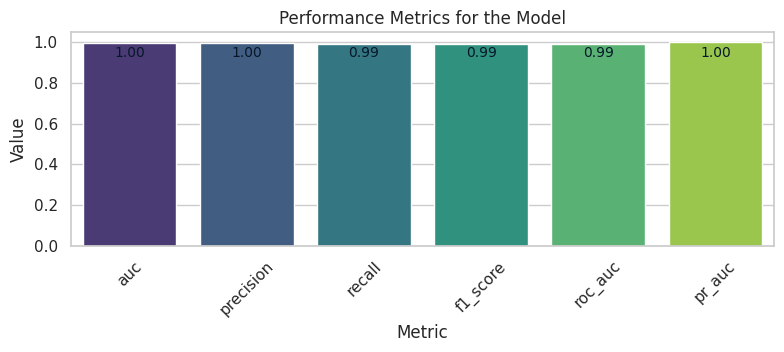

In [ ]:
top_model_dict = select_top_best_models(metrics_dict=model_metrics, drop=False, top_n=1)
plot_performance_metrics(pd.DataFrame.from_dict(top_model_dict, orient='index'))

In [ ]:
# Convert to DataFrame
df_top_models = pd.DataFrame({name: metrics for name, metrics in top_models}).T  # Transpose to make models the rows
df_top_models.reset_index(inplace=True)
df_top_models.rename(columns={'index': 'Model'}, inplace=True)

In [ ]:
# Suppress future warnings locally
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Set the aesthetic style of the plots
    sns.set(style="whitegrid")

    # Transpose the DataFrame for easier plotting of metrics (skipping 'y_pred' and 'y_probs' columns)
    df_plot = df_top_models.set_index('Model').drop(columns=['y_pred', 'y_probs', 'auc']).transpose()

    # Define the layout of the subplots
    num_metrics = len(df_plot)
    num_columns = 3
    num_rows = (num_metrics + num_columns - 1) // num_columns  # Round up the division

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, num_rows * 5), sharey=True)
    fig.suptitle('Performance Metrics Comparison Across Models', fontsize=16)

    # Flatten axes array and hide unused axes
    axes = axes.flatten()
    for ax in axes[num_metrics:]:
        ax.set_visible(False)

    # Loop through each metric and create a bar plot
    for ax, (metric, values) in zip(axes, df_plot.iterrows()):
        sns.barplot(ax=ax, x=values.index, y=values.values, palette='light:b', width=0.8)
        ax.set_title(metric)
        ax.set_ylabel('Value')
        ax.set_xlabel('Model')
        ax.tick_params(axis='x', rotation=45)

        # Adjusting the annotation placement
        for p in ax.patches:
            value = p.get_height()
            x = p.get_x() + p.get_width() / 2
            # Adjusting y to ensure the annotation always fits within the plot area
            if value >= ax.get_ylim()[1] * 0.9:  # If value is within the top 10% of the y-axis
                y = ax.get_ylim()[1] * 0.85  # Lower the annotation to 85% of the y-axis height
            else:
                y = value + 0.01 * ax.get_ylim()[1]  # Else, slightly above the bar
            ax.annotate(f"{value:.2f}", (x, y), ha='center', va='bottom', fontsize=10, color='#06172a', xytext=(0, 3), textcoords='offset points')

    # Adjust layout to prevent label overlap
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show the plot
    plt.show()


In [ ]:
# #Make prediction
# def build_model(hp, vocab_size, max_length):
#     model = keras.Sequential()
#     model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
#     model.add(keras.layers.Conv1D(
#         filters=hp.Int('filters', min_value=32, max_value=128, step=32),
#         kernel_size=hp.Choice('kernel_size', values=[3, 5, 7]),
#         activation='relu'))
#     model.add(keras.layers.GlobalMaxPooling1D())
#     model.add(keras.layers.Dense(units=hp.Int('units', min_value=10, max_value=100, step=10), activation='relu'))
#     model.add(keras.layers.Dense(1, activation='sigmoid'))

#     model.compile(
#         optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
#         loss='binary_crossentropy',
#         metrics=['AUC'])
#     return model

# # Assume vocab_size and max_length are defined here based on your dataset
# vocab_size = 10000  # example value
# max_length = 100    # example value

# tuner = kt.GridSearch(
#     hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
#     objective="val_loss",
#     max_trials=3,
#     overwrite=True,
#     executions_per_trial=1,
#     directory='my_dir',
#     project_name='grid_search_cnn'
# )

# # Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
# tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# best_model = tuner.get_best_models(num_models=1)[0]
# best_model.evaluate(X_test, y_test)

# y_pred_prob_cnn = best_model.predict(X_test).flatten()  # Get the probabilities
# y_pred_cnn = (y_pred_prob_cnn > 0.5).astype(int)  # Convert probabilities to binary class labels

Trial 3 Complete [00h 00m 17s]
val_loss: 0.3545342683792114

Best val_loss So Far: 0.017472857609391212
Total elapsed time: 00h 00m 57s
74/74 [==============================] - 0s 3ms/step


In [ ]:
best_final_model = None

def load_model_global(model_path):
    global best_final_model
    if os.path.isdir(model_path):
        # Assuming it's a Keras SavedModel directory
        try:
            best_final_model = load_model(model_path)
            print(f"Model loaded from {model_path}.")
        except Exception as e:
            print(f"Failed to load Keras model from {model_path}: {e}")
    else:
        # Assuming it's a pickle file
        try:
            with open(model_path, 'rb') as file:
                best_final_model = pickle.load(file)
            print(f"Model loaded from {model_path}.")
        except Exception as e:
            print(f"Failed to load pickle model from {model_path}: {e}")

def predict_with_best_final_model(model, data, tokenizer=None, max_length=None):
    if hasattr(model, 'predict'):
        # This branch is for Keras models
        if tokenizer is not None and max_length is not None:
            # Assume it's a Keras model expecting tokenized input
            sequences = tokenizer.texts_to_sequences(data['comment'])
            X_test_new = pad_sequences(sequences, maxlen=max_length)
            y_pred_prob = model.predict(X_test_new).flatten()
            y_pred = (y_pred_prob > 0.5).astype(int)
            return y_pred, y_pred_prob
        else:
            print("Tokenizer and max_length must be provided for Keras models.")
            return None, None
    elif hasattr(model, 'predict_proba'):
        # This branch is for sklearn models
        y_pred = model.predict(data)
        y_pred_prob = model.predict_proba(data)[:, 1]
        return y_pred, y_pred_prob
    else:
        print("Model type not supported for predictions.")
        return None, None


# Load the final model
final_model_path = 'models/cnn'  # Adjust this path to your model's location
load_model_global(final_model_path)

# Predict with the Keras model
comments = test_data_df  # DataFrame containing the comments
y_pred, y_pred_prob = predict_with_best_final_model(best_final_model, comments, tokenizer, max_length)

# Predict with the pickle model
# X_test = some_prepared_feature_set
# y_pred_rf, y_pred_prob_rf = predict_with_best_final_model(best_final_model, X_test)

#---------
# If you saved it as an HDF5 file, use the same file path.
# best_final_model = load_model('models/cnn')



In [ ]:
# Assuming you have already fitted a tokenizer on your training data
# Load or re-initialize the tokenizer
# tokenizer = Tokenizer(num_words=vocab_size)
# tokenizer.fit_on_texts(X_train)  # X_train needs to be your training data text

# # Convert the comments from test_data_df to sequences
# sequences = tokenizer.texts_to_sequences(test_data_df['comment'])

# # Pad the sequences so they have the same length
# X_test_new = pad_sequences(sequences, maxlen=max_length)

# Convert the comments from test_data_df to sequences
# test_sequences = tokenizer.texts_to_sequences(test_data_df['comment'])

# # Pad the sequences so they have the same length as your training data
# X_test_new = pad_sequences(test_sequences, maxlen=max_length)


# # Make predictions using the best model
# y_pred_prob = best_final_model.predict(X_test_new).flatten()
# y_pred = (y_pred_prob > 0.5).astype(int)

1033/1033 [==============================] - 5s 5ms/step


In [ ]:
# Create a DataFrame with comments and their predicted classes
predictions_df = pd.DataFrame({
    'comment': test_data_df['comment'],
    'predicted_class': y_pred
})

# Filter comments into two separate groups
negative_comments = predictions_df[predictions_df['predicted_class'] == 0]['comment']
positive_comments = predictions_df[predictions_df['predicted_class'] == 1]['comment']


Word Cloud for Negative Comments (Class 0):


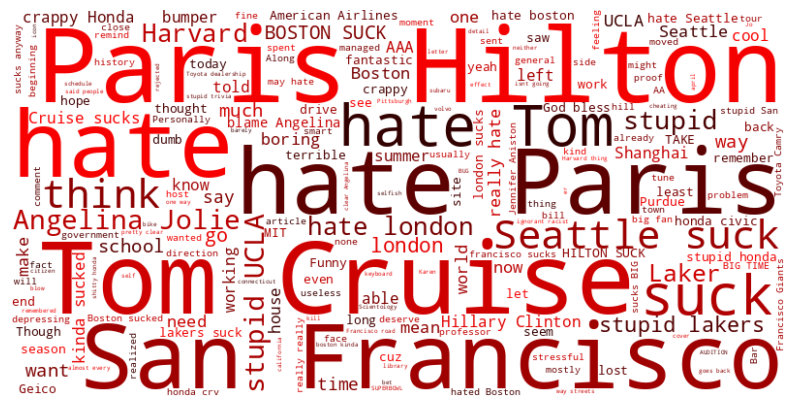

Word Cloud for Positive Comments (Class 1):


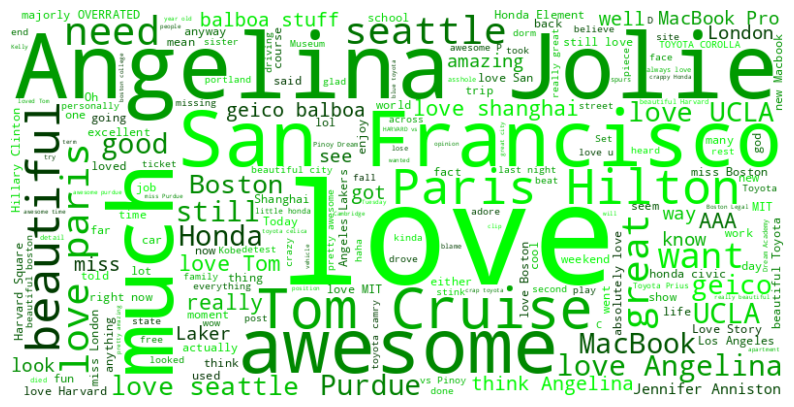

In [ ]:
from wordcloud import WordCloud, get_single_color_func
import matplotlib.pyplot as plt

class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the position in the list."""
    def __init__(self, color_to_words, default_color):
        self.color_to_words = color_to_words
        self.default_color = default_color

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        return get_single_color_func(self.color_to_words.get(word, self.default_color))

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

# Function to generate and display a word cloud with custom colors
def generate_wordcloud(text, color_to_words, default_color):
    wordcloud = WordCloud(width = 800, height = 400, background_color ='white',
                          color_func=SimpleGroupedColorFunc(color_to_words, default_color)).generate(" ".join(text))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Define colors for each word cloud
negative_color_to_words = {}
positive_color_to_words = {}

# Example: Assigning red shades for negative and green shades for positive
negative_default_color = 'darkred'  # Default color for words not in negative_color_to_words
positive_default_color = 'darkgreen'  # Default color for words not in positive_color_to_words

# Generate and display word cloud for negative comments
print("Word Cloud for Negative Comments (Class 0):")
generate_wordcloud(negative_comments, negative_color_to_words, negative_default_color)

# Generate and display word cloud for positive comments
print("Word Cloud for Positive Comments (Class 1):")
generate_wordcloud(positive_comments, positive_color_to_words, positive_default_color)


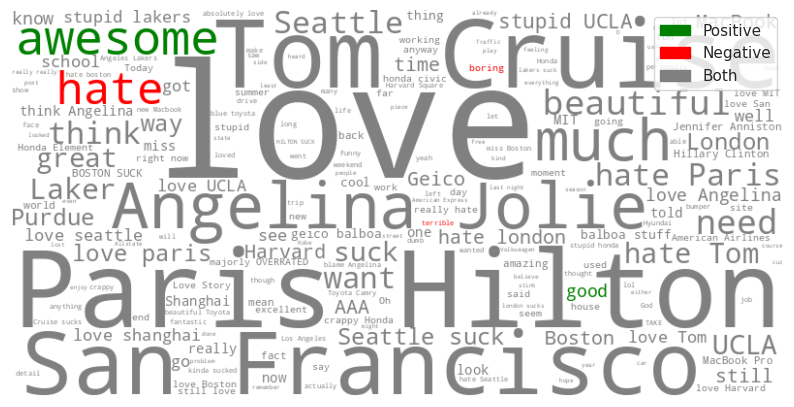

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Custom color function to apply colors based on word sentiment
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    positive_words = ['awesome', 'good', 'nice', 'super', 'fun', 'delightful', 'happy']  # Example positive words
    negative_words = ['hate', 'bad', 'awful', 'terrible', 'boring', 'sad', 'worse']  # Example negative words
    if word in positive_words:
        return 'green'
    elif word in negative_words:
        return 'red'
    else:
        return 'grey'  # Neutral color for words not specified

# Generate a combined word cloud
combined_comments = pd.concat([negative_comments, positive_comments])
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      color_func=color_func, prefer_horizontal=1.0).generate(" ".join(combined_comments))

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Create a legend for the colors
legend_handles = [mpatches.Patch(color='green', label='Positive'),
                  mpatches.Patch(color='red', label='Negative'),
                  mpatches.Patch(color='grey', label='Both')]
plt.legend(handles=legend_handles, loc='upper right')

plt.show()